数据形状: (10, 3, 32, 32)

Original input images:


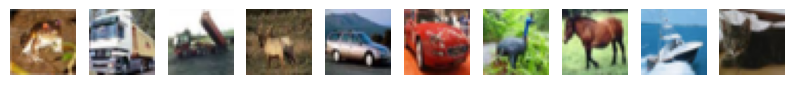

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming R is your loaded data with the shape (batch_size, 32, 32, 3)
R = np.load('/Users/jichanglong/Desktop/论文/实习/HSSP_related/hssp_new/expdata/initialization_purchase_cifar/cifar/images_epoch_10_batch_0.npy')
print("数据形状:", R.shape)  # 输出应该是 (batch_size, 32, 32, 3)
R = R.transpose(0, 2, 3, 1)
# Rescale the data to the range [0, 1]
R = (R - R.min()) / (R.max() - R.min())

n =10  # Assuming you want to plot 10 images
num_col = 10  # Assuming you want 10 columns in your figure
num_row = int(n / num_col)  # Calculating the number of rows needed

shape = (32, 32,3)  # The shape of each image
fig, axes = plt.subplots(num_row, num_col, figsize=(1. * num_col, 1. * num_row))

print('\nOriginal input images:')
for i, ax in enumerate(axes.flat):
    ax.set_axis_off()
    ax.imshow(R[i].reshape(shape))

plt.show()


In [1]:
! /Library/Frameworks/Python.framework/Versions/3.7/bin/python3 fl.py 

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 0 [0/50000 (0%)]	Loss: 2.287112
Train Epoch: 0 [10000/50000 (20%)]	Loss: 1.679936
Train Epoch: 0 [20000/50000 (40%)]	Loss: 1.655938
Train Epoch: 0 [30000/50000 (60%)]	Loss: 1.431909
Train Epoch: 0 [40000/50000 (80%)]	Loss: 1.521518

Test set: Average loss: 1.5293, Accuracy: 4551/10000 (46%)

Train Epoch: 1 [0/50000 (0%)]	Loss: 1.899619
Train Epoch: 1 [10000/50000 (20%)]	Loss: 1.934579
Train Epoch: 1 [20000/50000 (40%)]	Loss: 1.905422
Train Epoch: 1 [30000/50000 (60%)]	Loss: 1.388269
Train Epoch: 1 [40000/50000 (80%)]	Loss: 1.560538

Test set: Average loss: 1.4167, Accuracy: 5018/10000 (50%)



In [2]:
load('multi-dim-hssp.sage')
load("hssp.sage")
load("extendhssp.sage")

In [3]:
def generate_vector(sampling_number, data, batch_size, random_sampling = False, random_generation = False, rate = 0.5, sample_figure_length = 10):
    data = np.load(data)
    if random_generation == False:
        D=matrix(ZZ,data)
        e=vector(ones_matrix(1,batch_size))
        n = batch_size
        m0 = sampling_number
        freqD=(n+1)*[0]

        for x in e*D: 
            #print(x)
            freqD[x]+=1

        freqU=[binomial(n,i)/2.**n for i in range(n+1)]

        c=dict()
        for x in D.T: 
            h=x*e
            if h in c.keys(): c[h]+=[x]
            else: c[h]=[x]
        sampleSize=[int(m0*f) for f in freqU]
        
        if random_sampling == False:
            
            L = []
    # 假设 L 是一个列表，n 和 sampleSize 已经定义
            for i in range(n + 1):
        # 先检查键 i 是否存在于字典 c 中
                if i in c:
            # 如果存在，再检查 c[i] 的长度是否大于等于 sampleSize[i]
                    if len(c[i]) >= sampleSize[i]:
                # 如果是，正常采样
                        L += random.sample(c[i], k=sampleSize[i])
                    else:
                # 如果不是，取所有元素
                        L += c[i]
        else:
            L = []
            all_elements = []
            for key, value in c.items():
                all_elements.extend(value)
    # 然后，从这个列表中随机选取100个元素，前提是列表长度至少为100
            L += random.sample(all_elements, sampling_number)
        while True:
            random.shuffle(L)
            newX=matrix(ZZ,L)
            if newX.rank()==batch_size: break 
        
        freqnewX=(n+1)*[0]
        for x in newX*e: freqnewX[x]+=1
        G1=bar_chart(freqD, legend_label='frequency hw input')
        G2=bar_chart(freqnewX, legend_label='frequency hw output')
        G3=bar_chart(freqU, legend_label='frequency hw uniform')
        #for g in [G1,G2]: g.show()
        
        
    else:
        np.random.seed(0)

        size = (sampling_number, batch_size)
        p = [rate , 1 - rate]  # 0和1出现的概率
        #print(p)
    # 使用numpy的random.choice来生成矩阵
        random_matrix = np.random.choice([0, 1], size=size, p=p)

        
        while True:
            np.random.shuffle(random_matrix)
            newX=matrix(ZZ,random_matrix)
            if newX.rank()==batch_size: break 
        
        
    m=(newX.dimensions()[0])//batch_size*batch_size
        
    l = sample_figure_length
        
    x0,A,dummyX,dummyB=genParams_mat(m=m,l=batch_size)

    Y=newX[:m]   
   
    Y = matrix(ZZ,Y)
    print(Y.dimensions())
    return Y, x0


In [4]:
def matrixed_image(image,batch_size):
    alp = np.load(image)
    alp = (alp + 1.0) / 2.0

    # 将像素值缩放到[0,255]的范围
    alp = (alp * 255.0).astype(np.uint8)

    # 转置维度，以便图像数据变为(batch_size, height, width, channels)
    alp = np.transpose(alp, (0, 2, 3, 1))
    alp = alp.reshape(batch_size, -1)

    # alp=np.load("/Users/jichanglong/Desktop/hssp_All/quantize/alpha10_3072.npy")
    # print(alp.shape)
    Aifull = matrix(ZZ, alp)
    
    return Aifull

In [5]:
def process_image(Aifull, sample_figure_length):
    
    l = sample_figure_length
    someA=random.sample(Aifull.columns(),l)
    Ai=matrix(ZZ,someA).T
    
    return Ai


In [6]:
def NS_attack(batch_size, modulus, processed_image, generated_vector, sample_figure_length):
    n = batch_size
    
    x0 = modulus
    
    Ai = processed_image
    
    Y = generated_vector
    
    m = Y.dimensions()[0]
    
    l = sample_figure_length
    
    while True:
        rows_list = list(Y.rows())
        # 随机打乱行顺序
        random.shuffle(rows_list)
        # 将打乱后的行列表转换回矩阵
        Y = matrix(rows_list)
        Bi = Y * Ai % x0
        s = Matrix(Integers(x0), Bi[:l, :l]).determinant()
        if s != 0:
            break
    
    #kei,tt1,tt10,tt1O=Step1_Mat(n,x0,Ai,Y,Bi,m)
    kei, tt1, tt10, tt1O = Step1(n, -1, x0, Ai, Y, Bi, m, BKZ=True)

    MBi,beta,rAi,N,C =Step2_BK_mat(kei,Y,Ai,n,m,x0,Bi)
    
    return MBi,Y
    

In [41]:
def NS_attack_original(batch_size, modulus, processed_image, generated_vector, sample_figure_length):
    n = batch_size
    
    x0 = modulus
    
    Ai = processed_image
    
    Y = generated_vector
    
    m = Y.dimensions()[0]
    
    l = sample_figure_length
    
    while True:
        rows_list = list(Y.rows())
        # 随机打乱行顺序
        random.shuffle(rows_list)
        # 将打乱后的行列表转换回矩阵
        Y = matrix(rows_list)
        Bi = Y * Ai % x0
        s = Matrix(Integers(x0), Bi[:l, :l]).determinant()
        if s != 0:
            break
    
    #kei,tt1,tt10,tt1O=Step1_Mat(n,x0,Ai,Y,Bi,m)
    kei, tt1, tt10, tt1O = Step1_original(n, -1, x0, Ai, Y, Bi, m)

    MBi,beta =Step2_BKZ(kei,1,n,m,x0,Y,1,1,-1)
    
    return MBi,Y
    

In [42]:
def Multi_attack(batch_size, modulus, processed_image, generated_vector, sample_figure_length):
    n = batch_size
    
    x0 = modulus
    
    Ai = processed_image
    
    Y = generated_vector
    
    m = Y.dimensions()[0]
    
    l = sample_figure_length
    
    while True:
        rows_list = list(Y.rows())
        random.shuffle(rows_list)
        Y = matrix(rows_list)
        Bi = Y * Ai % x0
        s = Matrix(Integers(x0), Bi[:l, :l]).determinant()
        if s != 0:
            break
    
    MO,tt1,tt10,tt1O= Step1_Mat(n,x0,Ai,Y,Bi,m) 
    
    tei, tef, tt2,nrafound,MB,NFound,Coef = eigen_mat(n,-1,MO,x0, Ai,Y,Bi,m)
    
    MB = matrix(ZZ,MB)
    
    return MB,Y

In [43]:
import numpy as np
from sklearn.decomposition import FastICA
import math
from time import time

In [44]:
def ICA(X, B=1, n=16, kappa=-1, exn=0):
    t = time()
    X = np.asarray(X)
    ncomp, sample = X.shape
    #print(X.shape)
    ica = FastICA(n_components=ncomp, fun='cube')
    S_ = ica.fit_transform(X.T)
    A_ = ica.mixing_
    # assert np.allclose(X.T, np.dot(S_, A_.T) + ica.mean_)

    # we want to remove the mean
    #print(A_)
    #print(np.linalg.inv(A_.T).shape)
    s0 = np.dot(ica.mean_, np.linalg.inv(A_.T))
    S_ += s0

    # assert np.allclose(X, np.dot(A_,S_.T))  # now the mean is 0

    # we want that the components of S_ are positive
    # if the average of a column of S_ is negative, we take the opposite
    Sm = np.sign(np.average(S_, axis=0))
    S_ *= Sm
    A_ *= Sm

    # assert np.allclose(X, np.dot(A_,S_.T))

    # we want that the components of S_ are 0 or 1
    # If all the components of S_ are 0 or 1, the standard deviation will be 1/2
    # If the components are uniformly distributed between 0 and B, the standard deviation is
    # sqrt(B(B+2)/12)
    # So we divide the components of S_ by std/sqrt(B(B+2)/12), where std is computed column by column
    if kappa == -1 and exn == 0:
        exn = math.sqrt(B * (B + 2) / 12.)
    elif exn == 0:
        exn = math.sqrt((2 * B + 1) * (B + 1) * kappa / (n * 6.) - (kappa * (B + 1) / (2 * n)) ** 2)  # exn=math.sqrt((2*B+1)*(B+1)*kappa/(n*6.))

    st = S_.std(axis=0) / exn
    S_ /= st
    A_ *= st

    # print " ICA.py %.2f" %(time()-t),
    # assert np.allclose(X, np.dot(A_,S_.T))
    np.save('./ICA/A_.npy',A_)
    
    np.save('./ICA/S.npy',S_.T)

    #return A_, S_.T
    return


In [45]:
def Statistical_attack(batch_size, modulus, processed_image, generated_vector, sample_figure_length):
    n = batch_size
    
    x0 = modulus
    
    Ai = processed_image
    
    Y = generated_vector
    
    m = Y.dimensions()[0]
    
    l = sample_figure_length
    
    while True:
        rows_list = list(Y.rows())
        random.shuffle(rows_list)
        Y = matrix(rows_list)
        Bi = Y * Ai % x0
        s = Matrix(Integers(x0), Bi[:l, :l]).determinant()
        if s != 0:
            break
            
    
    
    MO,tt1,tt10,tt1O= Step1(n,-1,x0,Ai,Y,Bi,m, BKZ=True)
    
    print ("\nStatistical Attack")     
    
    MOn,MO=statistical_1(MO,n,m,x0,Y,Ai ,Bi, -1)
    
    
    #print(MOn)
    print(len(MOn))
    print(MOn[0].shape)
    ICA(MOn)
    
    tica, tt2, nrafound, MB,NFound,Coef = statistical_2_mat(MOn,MO,n,m,x0,Y,Ai,Bi,-1)
    
    if MB == 0:
        return 0,0
    
    if not np.all(np.floor(MB) == MB):
        return 1,1
    MB = matrix(ZZ,MB)
    

    return MB,Y





In [46]:
def All_attack_old(batch_size, modulus, processed_image, generated_vector, sample_figure_length):
    n = batch_size
    
    x0 = modulus
    
    Ai = processed_image
    
    Y = generated_vector
    
    m = Y.dimensions()[0]
    
    l = sample_figure_length
    
    while True:
        rows_list = list(Y.rows())
        # 随机打乱行顺序
        random.shuffle(rows_list)
        # 将打乱后的行列表转换回矩阵
        Y = matrix(rows_list)
        Bi = Y * Ai % x0
        s = Matrix(Integers(x0), Bi[:l, :l]).determinant()
        if s != 0:
            break
    
    
    print ("\nNS Attack")
    # 进行 NS 攻击
    start_time = time()
    kei,tt1,tt10,tt1O=Step1_Mat(n,x0,Ai,Y,Bi,m)
    MBi,beta,rAi,NFound,Coef =Step2_BK_mat(kei,Y,Ai,n,m,x0,Bi)
    end_time = time()
    
    
    if MBi == 0:
        print("====================================================================\n")
        print("\n一类错误，NS攻击报错了：'sage.rings.integer.Integer' object has no attribute 'T'")
    elif MBi == 1:
        print("====================================================================\n")
        print("\nNS二类错误，攻击报错了：'Setp2 non_sqaure")
    else: 
        print(f"无报错，找到的：{NFound}和{Coef}")
        print("NS_attack 时间: {:.6f} 秒".format(end_time - start_time))
        
        
    print ("\nMulti Attack") 
    # 进行 Multi 攻击
    start_time = time()
    MO,tt1,tt10,tt1O= Step1_ori_Mat(n,-1,x0,Ai,Y,Bi,m) 
    
    tei, tef, tt2,nrafound,MB,NFound,Coef = eigen_mat(n,-1,MO,x0, Ai,Y,Bi,m)
    end_time = time()
    if MB == 0:
        print("三类错误")
        pass
    else: 
        print(f"无报错，找到的：{NFound}和{Coef}")
        print("Multi_attack 时间: {:.6f} 秒".format(end_time - start_time))

    
    print ("\nStatistical Attack")  
    
    # 进行 Statistical 攻击
    start_time = time()
    MO,tt1,tt10,tt1O= Step1(n,-1,x0,Ai,Y,Bi,m, BKZ=True)  
    if MO == -1:
        return 
    MOn,MO=statistical_1(MO,n,m,x0,Y,Ai ,Bi, -1)
    ICA(MOn)  
    tica, tt2, nrafound, MB,NFound,Coef = statistical_2_mat(MOn,MO,n,m,x0,Y,Ai,Bi,-1)     
    end_time = time()
    
    
    if MB == 0:
        print("====================================================================\n")
        print("四类错误，statistical.sage.  S2 = A2.inverse() * MO")  
    elif not np.all(np.floor(MB) == MB):
        print("====================================================================\n")
        print("五类错误，Integer problem")
    else:
        print(f"找到的：{NFound}和{Coef}")
        print("Statistical_attack 时间: {:.6f} 秒".format(end_time - start_time))
    return 
    #MB = matrix(ZZ,MB)
    
    
    
    #return attack_results,Y
    

In [47]:
def All_attack(batch_size, modulus, processed_image, generated_vector, sample_figure_length, round_number):
    n = batch_size
    x0 = modulus
    Ai = processed_image
    Y = generated_vector
    m = Y.dimensions()[0]
    l = sample_figure_length
    
    while True:
        rows_list = list(Y.rows())
        random.shuffle(rows_list)
        Y = matrix(rows_list)
        Bi = Y * Ai % x0
        s = Matrix(Integers(x0), Bi[:l, :l]).determinant()
        if s != 0:
            break
    
    # 数据结构
    attack_data = {
        'Round': round_number,
        'Attack Type': '',
        'Error Type': 0,
        'Time': None,
        'NFound': None,
        'Coef': None
    }
    
    # NS攻击
    attack_data['Attack Type'] = 'NS Attack'
    start_time = time()
    try:
        #kei, tt1, tt10, tt1O = Step1_ori_Mat(n, -1, x0, Ai, Y, Bi, m)
        kei, tt1, tt10, tt1O = Step1_original(n, -1, x0, Ai, Y, Bi, m)
        #MBi, beta, rAi, NFound, Coef = Step2_BK_mat(kei, Y, Ai, n, m, x0, Bi)
        MBi,beta =Step2_BKZ(kei,1,n,m,x0,Y,1,1,-1)
        NFound = batch_size
        Coef = batch_size
        if MBi == 0:
            attack_data['Error Type'] = 1
        elif MBi == 1:
            attack_data['Error Type'] = 2
        else:
            attack_data.update({'Time': time() - start_time, 'NFound': NFound, 'Coef': Coef})
    except Exception as e:
        attack_data['Error Type'] = 'Exception: ' + str(e)
    results.append(attack_data.copy())

    # Multi攻击
    attack_data['Attack Type'] = 'Multi Attack'
    start_time = time()
    try:
        #MO, tt1, tt10, tt1O = Step1_Mat(n, x0, Ai, Y, Bi, m)
        MO, tt1, tt10, tt1O = Step1(n, -1, x0, Ai, Y, Bi, m, BKZ=True)
        tei, tef, tt2, nrafound, MB, NFound, Coef = eigen_mat(n, -1, MO, x0, Ai, Y, Bi, m)
        if MB == 0:
            attack_data['Error Type'] = 3
        else:
            attack_data.update({'Time': time() - start_time, 'NFound': NFound, 'Coef': Coef})
    except Exception as e:
        attack_data['Error Type'] = 'Exception: ' + str(e)
    results.append(attack_data.copy())

    # Statistical攻击
    attack_data['Attack Type'] = 'Statistical Attack'
    start_time = time()
    try:
        MO, tt1, tt10, tt1O = Step1(n, -1, x0, Ai, Y, Bi, m, BKZ=True)
        if MO == -1:
            return 
        MOn, MO = statistical_1(MO, n, m, x0, Y, Ai, Bi, -1)
        ICA(MOn)  
        tica, tt2, nrafound, MB, NFound, Coef = statistical_2_mat(MOn, MO, n, m, x0, Y, Ai, Bi, -1)
        if MB == 0:
            attack_data['Error Type'] = 4
        elif not np.all(np.floor(MB) == MB):
            attack_data['Error Type'] = 5
        else:
            attack_data.update({'Time': time() - start_time, 'NFound': NFound, 'Coef': Coef})
    except Exception as e:
        attack_data['Error Type'] = 'Exception: ' + str(e)
    results.append(attack_data.copy())


In [7]:


import numpy as np
import random
import matplotlib.pyplot as plt
import json



In [8]:
def image_reconstruction(MBi, matrixB, batch_size):
    
    res_alpha = np.linalg.lstsq(MBi.T, matrixB, rcond=None)[0]

    # print(res_alpha.shape)
    # print('Reconstructed input using NS attack:')
    num_col = batch_size
    if batch_size >20:
        num_col = batch_size//4
    num_row = int(batch_size / num_col)
    #num_samples = num_row * num_col
    shape = (32, 32, 3)
    fig, axes = plt.subplots(num_row, num_col, figsize=(1. * num_col, 1. * num_row))
    for i, ax in enumerate(axes.flat):
        ax.set_axis_off()
        ax.imshow(res_alpha[i].reshape(shape).astype(np.uint8), cmap='gray')
#     plt.savefig('./figure/cifar_cat_40/cifar10-NS.pdf')  # 保存为 PDF
#     plt.savefig('./figure/cifar_cat_40/cifar10-NS.png', dpi=600)  # 保存为 PNG，指定分辨率为300 dpi


In [50]:
#test code 之后记得改回来后删除！

load("hssp.sage")
load('multi-dim-hssp.sage')
load("extendhssp.sage")
load("statistical.sage")


generated_vector, modulus = generate_vector(sampling_number, relu_data, batch_size, random_sampling, random_generation, rate, sample_figure_length)


full_image = matrixed_image(original_image, batch_size)


processed_image = process_image(full_image, sample_figure_length)


#reconstructed_vector,generated_vector_nonsingular = NS_attack_original(batch_size, modulus, processed_image, generated_vector, sample_figure_length)


#reconstructed_vector,generated_vector_nonsingular = NS_attack(batch_size, modulus, processed_image, generated_vector, sample_figure_length)

#reconstructed_vector,generated_vector_nonsingular = Multi_attack(batch_size, modulus, processed_image, generated_vector, sample_figure_length)

reconstructed_vector,generated_vector_nonsingular = Statistical_attack(batch_size, modulus, processed_image, generated_vector, sample_figure_length)

# if reconstructed_vector == 0:
#     print("wrong")
# elif reconstructed_vector == 1:
#     print("non integer")

matrixB = generated_vector_nonsingular * full_image % modulus



image_reconstruction(reconstructed_vector, matrixB, batch_size)

NameError: name 'relu_data' is not defined

In [82]:
#special_version

def All_attack_special(batch_size, modulus, processed_image, generated_vector, sample_figure_length, round_number):
    n = batch_size
    x0 = modulus
    Ai = processed_image
    Y = generated_vector
    m = Y.dimensions()[0]
    l = sample_figure_length
    
    while True:
        rows_list = list(Y.rows())
        random.shuffle(rows_list)
        Y = matrix(rows_list)
        Bi = Y * Ai % x0
        s = Matrix(Integers(x0), Bi[:l, :l]).determinant()
        if s != 0:
            break
    
    # 数据结构
    attack_data = {
        'm': round_number,
        'Attack Type': '',
        'Error Type': 0,
        'Time': None,
        'NFound': None,
        'Coef': None
    }
    
    # NS攻击
    attack_data['Attack Type'] = 'NS Attack'
    start_time = time()
    try:
        #kei, tt1, tt10, tt1O = Step1_ori_Mat(n, -1, x0, Ai, Y, Bi, m)
        kei, tt1, tt10, tt1O = Step1_original(n, -1, x0, Ai, Y, Bi, m)
        #MO, tt1, tt10, tt1O = Step1(n, -1, x0, Ai, Y, Bi, m, BKZ=True)
        #MBi, beta, rAi, NFound, Coef = Step2_BK_mat(kei, Y, Ai, n, m, x0, Bi)
        MBi,beta =Step2_BKZ(kei,1,n,m,x0,Y,1,1,-1)
        NFound = batch_size
        Coef = batch_size
        if MBi == 0:
            attack_data['Error Type'] = 1
        elif MBi == 1:
            attack_data['Error Type'] = 2
        else:
            attack_data.update({'Time': time() - start_time, 'NFound': NFound, 'Coef': Coef})
    except Exception as e:
        attack_data['Error Type'] = 'Exception: ' + str(e)
    results.append(attack_data.copy())

    # Multi攻击
    attack_data['Attack Type'] = 'Multi Attack'
    start_time = time()
    try:
        #MO, tt1, tt10, tt1O = Step1_Mat(n, x0, Ai, Y, Bi, m)
        MO, tt1, tt10, tt1O = Step1(n, -1, x0, Ai, Y, Bi, m, BKZ=True)
        tei, tef, tt2, nrafound, MB, NFound, Coef = eigen_mat(n, -1, MO, x0, Ai, Y, Bi, m)
        if MB == 0:
            attack_data['Error Type'] = 3
            attack_data.update({'NFound': 0, 'Coef':0})
        else:
            attack_data.update({'Time': time() - start_time, 'NFound': NFound, 'Coef': Coef})
    except Exception as e:
        attack_data['Error Type'] = 6 
        attack_data.update({'NFound': 0, 'Coef':0})
    results.append(attack_data.copy())

    # Statistical攻击
    attack_data['Attack Type'] = 'Statistical Attack'
    start_time = time()
    try:
        MO, tt1, tt10, tt1O = Step1(n, -1, x0, Ai, Y, Bi, m, BKZ=True)
        if MO == -1:
            return 
        MOn, MO = statistical_1(MO, n, m, x0, Y, Ai, Bi, -1)
        ICA(MOn)  
        tica, tt2, nrafound, MB, NFound, Coef = statistical_2_mat(MOn, MO, n, m, x0, Y, Ai, Bi, -1)
        if MB == 0:
            attack_data['Error Type'] = 4
        elif not np.all(np.floor(MB) == MB): 
            attack_data['Error Type'] = 5
        else:
            attack_data.update({'Time': time() - start_time, 'NFound': NFound, 'Coef': Coef})
    except Exception as e:
        attack_data['Error Type'] = 'Exception: ' + str(e)
    results.append(attack_data.copy())


In [52]:
conf_path = './utils/conf.json'

    # 读取配置文件
with open(conf_path, 'r') as f:
    conf = json.load(f)
    
size =10
#这是20的

relu_data = f"./expdata/expdata_batchsize_{size}/gradients_fc1_relu_binary_epoch_1_batch_0.npy"

original_image = f"./expdata/expdata_batchsize_{size}/images_epoch_1_batch_0.npy"

sampling_number=10

batch_size=conf["batch_size"]


batch_size=size
print(batch_size)
random_sampling = True

random_generation = True

rate = 0.5

sample_figure_length = 10

test_rounds = 50


10


In [70]:
load("hssp.sage")
load('multi-dim-hssp.sage')
load("extendhssp.sage")
load("statistical.sage")


from time import time
import random
# 预定义数据收集列表
results = []




sampling_number = 50

    # 生成向量和处理图像的逻辑...
generated_vector, modulus = generate_vector(sampling_number, relu_data, batch_size, random_sampling, random_generation, rate, sample_figure_length)

full_image = matrixed_image(original_image, batch_size)
processed_image = process_image(full_image, sample_figure_length)
All_attack_special(batch_size, modulus, processed_image, generated_vector, sample_figure_length, i + 1)

print(results)

(50, 10)
Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 40 out of 40
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(50, 65)
  Kernel: 0.0
ke23dimensions:(15, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 40 out of 40
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0005120000000040648 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0005449999999989075
[ 1 -1  0  0  0  0  0  0  0  0]
[ 0  0  1  0  0  0  0  0  0 -1]
[ 0  0  0  0 -1  0  0  0  0  1]
[ 1  0  0  0  0  0  0  0  0 -1]
[ 0  0  0  0  0  0  0  0 -1  1]
[ 0  1  0  0  0  0  0 -1  0  0]
[ 0  1  0  0  0  0  0  0  0  0]
[ 0  0  0  1  0  0  0  0  0 -1]
[ 0  0  0  0  0 -1  0  0  0  1]
[ 0  0 -1  0  0  0  1  0  0  0]
mathNbits A= 1
 cputime ICA 0.00
  NFound= 10 out of 10 ch

In [75]:
load("hssp.sage")
load('multi-dim-hssp.sage')
load("extendhssp.sage")
load("statistical.sage")


from time import time
import random
sampling_number = 10
# 预定义数据收集列表
results = []


run_index = 1
for i in range(10):
    print(f"第{i+1}轮")
    sampling_number = sampling_number + 10

    # 生成向量和处理图像的逻辑...
    generated_vector, modulus = generate_vector(sampling_number, relu_data, batch_size, random_sampling, random_generation, rate, sample_figure_length)

    full_image = matrixed_image(original_image, batch_size)
    processed_image = process_image(full_image, sample_figure_length)
    All_attack_special(batch_size, modulus, processed_image, generated_vector, sample_figure_length, i + 1)

with open(f'./comparisonData/data_m_times/small_again/docu_small_{run_index}.txt', 'w') as f:
    for result in results:
        f.write(f"Round: {result['m']}, Attack Type: {result['Attack Type']}, Error: {result['Error Type']}, Time: {result['Time']}, NFound: {result['NFound']}, Coef: {result['Coef']}\n")

第1轮
(60, 10)
Step 1
LLL step1: 0.1
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.1
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 50 out of 50
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(60, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.032583999999985735
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 50 out of 50
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0006529999999997926 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0005189999999970496
[ 0  0  0 -1  0  0  0  0  1  0]
[ 0  0  0  1  0  0 -1  0  0  0]
[ 0  0  0  0  0  1  0  0 -1  0]
[ 0  0  0  1  0  0  0  0  0  0]
[ 0 -1  0  0  0  0  0  0  1  0]
[ 1 -1  0  0  0  0  0  0  0  0]
[ 0  0  0  0  1  0  0  0 -1  0]
[ 0  0

  Sred2:0.1
  #ortho vecs= 260 out of 260
  Kernel LLL: 0.0
  Total Step 1: 0.1
Step 2-ICA:  roundA
 time LLL= 0.0022069999999985157 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.00031800000004977846
[-1  1  0  0  0  0  0  0  0  0]
[ 0  1  0  0  0 -1  0  0  0  0]
[ 0  1  0  0  0  0  0  0  0  0]
[ 0  1 -1  0  0  0  0  0  0  0]
[ 1  0  0  0  0  0  0 -1  0  0]
[ 0  1  0  0  0  0  0  0 -1  0]
[ 0  1  0  0  0  0  0  0  0 -1]
[ 0  1  0  0  0  0 -1  0  0  0]
[ 0 -1  0  1  0  0  0  0  0  0]
[-1  0  0  0  1  0  0  0  0  0]
mathNbits A= 1
 cputime ICA 0.00
  NFound= 10 out of 10 check= 0.01
  Coefs of a found= 10 out of 10  time= 0.00
  Total step2: 0.0
第9轮
(300, 10)
Step 1
LLL step1: 10.5
  log(Height,2)= 0
  Kernel: 0.1
  Total step1: 10.6
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.1
  #ortho vecs= 290 out of 290
  Kernel LLL: 0.0
  Total Step 1: 0.2
Step 2
xt23dimension:(300, 65)
  Ke

  Sred1:0.1
  Sred2:0.2
  #ortho vecs= 470 out of 470
  Kernel LLL: 0.0
  Total Step 1: 0.4
Step 2
xt23dimension:(480, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.0412860000000137
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.1
  Sred2:0.2
  #ortho vecs= 470 out of 470
  Kernel LLL: 0.0
  Total Step 1: 0.4
Step 2-ICA:  roundA
 time LLL= 0.003834999999980937 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0004479999999489337
[ 0  0  0  0  0  1  0  0 -1  0]
[ 0  0  0  0  0  0  0  0  1  0]
[ 0  0  1  0  0 -1  0  0  0  0]
[ 0  1  0  0  0 -1  0  0  0  0]
[ 1  0  0  0  0  0  0  0 -1  0]
[ 0  0  0  0  0  0  0  0 -1  1]
[ 0  0  0  0 -1  0  0  0  1  0]
[ 0  0  0  0  0  0  0  1 -1  0]
[ 0  0  0  1  0 -1  0  0  0  0]
[ 0  0  0  0  0  0 -1  0  1  0]
mathNbits A= 1
 cputime ICA 0.00
  NFound= 10 out of 10 check= 0.01
  Coefs of a found= 10 out of 10  time= 0.00
  Total 

In [91]:
#50次的平滑数据：

# 假设在代码开始之前已经有了一个初始的sampling_number值
initial_sampling_number = 10

# 外部循环从1到50
for run_index in range(1, 51):
    print(f"执行序号 {run_index}")
    results = []
    # 每次外部循环开始，重置sampling_number到初始值
    sampling_number = initial_sampling_number
    
    # 内部循环，重复16次
    for i in range(10):
        print(f"第{i+1}轮")
        sampling_number += 10

        # 生成向量和处理图像的逻辑...
        generated_vector, modulus = generate_vector(sampling_number, relu_data, batch_size, random_sampling, random_generation, rate, sample_figure_length)

        full_image = matrixed_image(original_image, batch_size)
        processed_image = process_image(full_image, sample_figure_length)
        All_attack_special(batch_size, modulus, processed_image, generated_vector, sample_figure_length, i + 1)

    # 写入结果到文件，文件名中包含当前的run_index
    print(results)
    with open(f'./comparisonData/data_m_times/small_again/docu_small_{run_index}.txt', 'w') as f:
        for result in results:
            f.write(f"Round: {result['m']}, Attack Type: {result['Attack Type']}, Error: {result['Error Type']}, Time: {result['Time']}, NFound: {result['NFound']}, Coef: {result['Coef']}\n")


执行序号 1
第1轮
(20, 10)
Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 9
  NFound= 8
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 10 out of 10
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(20, 65)
  Kernel: 0.0
ke23dimensions:(45, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 10 out of 10
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.00026199999774689786 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0005250000031082891
[-1  0  0  0  0  0  1  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0]
[ 0  0  0 -1  0  0  0  0  1  0]
[-1  0  1  0  0  0  0  0  0  0]
[ 0 -1  0  0  1  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  1  0]
[ 0  0  0  0  0  0  0  1 -1  0]
[ 0  0  0  0  0  1  0  0  0 -1]
[ 0  0  0  0  0  1  0  0  0  0]
[ 0  0  0  0  1  0  0  0 -1  0]
第2轮
(30, 10)
Step 1
LLL step1: 0.0
  log(Height,

Step 1
LLL step1: 0.5
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.5
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 100 out of 100
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(110, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.04050999999890337
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 100 out of 100
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0009869999994407408 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0006560000001627486
[ 0  0  0  0  0  1  0 -1  0  0]
[-1  0  0  0  0  0  0  1  0  0]
[ 0  0  0  0  0  0  0  1  0  0]
[ 0  0  0  1  0 -1  0  0  0  0]
[ 0  0  0 -1  0  0  0  0  0  1]
[ 0 -1  0  0  0  1  0  0  0  0]
[ 0  0 -1  0  0  0  0  1  0  0]
[ 0  0  0  0  0

ke23dimensions:(10, 100)
Eigenvectors computation 0.04144500000256812
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 50 out of 50
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0005500000006577466 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0003639999995357357
[ 0  0  0  0  1 -1  0  0  0  0]
[ 0  0  0  0 -1  0  1  0  0  0]
[-1  0  1  0  0  0  0  0  0  0]
[-1  0  0  0  0  1  0  0  0  0]
[ 0  0  0 -1  1  0  0  0  0  0]
[ 0  0  0  0  1  0  0  0  0  0]
[ 0  0 -1  0  0  0  0  0  1  0]
[ 0  0  0  0  1  0  0 -1  0  0]
[ 1 -1  0  0  0  0  0  0  0  0]
[ 1  0  0  0  0  0  0  0  0 -1]
mathNbits A= 1
 cputime ICA 0.00
  NFound= 10 out of 10 check= 0.00
  Coefs of a found= 10 out of 10  time= 0.00
  Total step2: 0.0
第6轮
(70, 10)
Step 1
LLL step1: 0.1
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.1
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Num

Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 9
  NFound= 8
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 10 out of 10
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(20, 65)
  Kernel: 0.0
ke23dimensions:(45, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 10 out of 10
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.00025599999935366213 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0007259999983943999
[ 0  0  0  0 -1  1  0  0  0  0]
[ 0  0  0  0  0  1  0  0 -1  0]
[ 0  0  0  0  0  0 -1  0  0  0]
[ 0  0  0  0  0  0  0 -1  0  1]
[ 0 -1 -1  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0 -1  1  0]
[ 0  1  0  0  0  0  0  0  0  0]
[-1 -1  0  0  0  0  1  0  0  0]
[ 1  0  0  0  0  0  0  0  0  0]
[ 0  0  0  1  0  0  0  0  0  0]
第2轮
(30, 10)
Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0


  Coefs of a found= 8 out of 10  time= 0.00
  Total step2: 0.0
第9轮
(100, 10)
Step 1
LLL step1: 0.3
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.4
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 90 out of 90
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(100, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.04990399999951478
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 90 out of 90
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0008589999997639097 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0003640000031737145
[-1  0  0  0  0  0  0  0  0  1]
[ 0  0  0  0  1  0  0  0  0 -1]
[ 0  0  0  0  0  0  0  0  0  1]
[ 0  0  0  0  0 -1  0  0  0  1]
[ 1  0 -1  0  0  0  0  0  0  0]
[ 1  0

  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 30 out of 30
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0004269999990356155 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0006339999963529408
[ 0  0 -1  0  0  0  0  0  0 -1]
[ 0  0  0  0  0  1  0  1  0  0]
[ 0 -1  0  0  1  0  0  0  0  0]
[ 0  0 -1  0  0  0  0  0  1  1]
[ 0  0  0  0  0 -1  0  0  0  0]
[ 0  0  0  0  0 -1  0  0  1  0]
[-1  0  0  0  0 -1  0  0  0 -1]
[ 0  0  0  0  0  1  0  0  0  0]
[ 0 -1  0  1  0  0  0  0  0  0]
[ 0  0  0  0 -1  0  1  0 -1  0]
第4轮
(50, 10)
Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 40 out of 40
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(50, 65)
  Kernel: 0.0
ke23dimensions:(15, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 40 ou

[{'m': 1, 'Attack Type': 'NS Attack', 'Error Type': 0, 'Time': 0.010819196701049805, 'NFound': 10, 'Coef': 10}, {'m': 1, 'Attack Type': 'Multi Attack', 'Error Type': 3, 'Time': 0.010819196701049805, 'NFound': 10, 'Coef': 10}, {'m': 1, 'Attack Type': 'Statistical Attack', 'Error Type': 4, 'Time': 0.010819196701049805, 'NFound': 10, 'Coef': 10}, {'m': 2, 'Attack Type': 'NS Attack', 'Error Type': 0, 'Time': 0.02314019203186035, 'NFound': 10, 'Coef': 10}, {'m': 2, 'Attack Type': 'Multi Attack', 'Error Type': 3, 'Time': 0.02314019203186035, 'NFound': 10, 'Coef': 10}, {'m': 2, 'Attack Type': 'Statistical Attack', 'Error Type': 3, 'Time': 0.07436370849609375, 'NFound': 1, 'Coef': 2}, {'m': 3, 'Attack Type': 'NS Attack', 'Error Type': 0, 'Time': 0.04114198684692383, 'NFound': 10, 'Coef': 10}, {'m': 3, 'Attack Type': 'Multi Attack', 'Error Type': 3, 'Time': 0.04114198684692383, 'NFound': 10, 'Coef': 10}, {'m': 3, 'Attack Type': 'Statistical Attack', 'Error Type': 4, 'Time': 0.04114198684692383,

LLL step1: 0.1
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.1
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 60 out of 60
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(70, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.033341999998810934
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 60 out of 60
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0006659999999101274 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.00025999999706982635
[ 0  0 -1  0  1  0  0  0  0  0]
[ 0 -1  0  0  0  0  0  1  0  0]
[ 0  1 -1  0  0  0  0  0  0  0]
[ 0  0  0  1  0  0  0 -1  0  0]
[ 0  1  0  0  0  0  0  0  0  0]
[ 0  0 -1  0  0  1  0  0  0  0]
[ 1  0  0  0  0  0  0 -1  0  0]
[ 0  0  0  0  0  0  1 -1 

Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 9
  NFound= 8
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 10 out of 10
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(20, 65)
  Kernel: 0.0
ke23dimensions:(45, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 10 out of 10
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.00029100000028847717 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0002500000009604264
[ 0  0  0  0  0  1 -1  0  0  0]
[ 0  0  0  0  0  0  0  0 -1  0]
[ 0  0  0  1  0  0  0 -1  0  0]
[ 0 -1  0  0  0  0  0  1  0  0]
[ 0  1  0  0  0  1 -1 -1  0  0]
[ 0  0  0 -1  0  0  0  0  0  0]
[ 0  0 -1  0  1  0  0  0  0  0]
[-1  0  0  0 -1  0  0  0  1  0]
[ 1  0  0  0  0  0  0  0  1  0]
[ 0  0  0  0  1 -1  0  0  0  0]
第2轮
(30, 10)
Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0


Step 1
LLL step1: 0.3
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.4
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 90 out of 90
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(100, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.03360600000087288
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 90 out of 90
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.000853999998071231 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.00023599999985890463
[ 0  1  0  0  0  0  0  0  0 -1]
[ 0  0  0  0  0  0 -1  0  1  0]
[ 0  1  0  0  0  0  0  0 -1  0]
[ 0  0  0  0  0  0  0  0  1  0]
[ 0 -1  0  0  0  1  0  0  0  0]
[ 0  0  0 -1  0  0  1  0  0  0]
[-1  0  0  0  0  0  1  0  0  0]
[ 0  0  0  0  0  0 

ke23dimensions:(15, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 40 out of 40
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.00047699999777250923 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0007379999988188501
[ 1 -1  0  0  0  0  0  0  0  0]
[ 0  0  1  0  0  0  0  0  0 -1]
[ 0  0  0  0  1  0  0  0  0 -1]
[ 1  0  0  0  0  0  0  0  0 -1]
[ 0  0  0  0  0  0  0  0  1 -1]
[ 0 -1  0  0  0  0  0  1  0  0]
[ 0  1  0  0  0  0  0  0  0  0]
[ 0  0  0 -1  0  0  0  0  0  1]
[ 0  0  0  0  0 -1  0  0  0  1]
[ 0  0 -1  0  0  0  1  0  0  0]
mathNbits A= 1
 cputime ICA 0.00
  NFound= 10 out of 10 check= 0.00
  Coefs of a found= 10 out of 10  time= 0.00
  Total step2: 0.0
第5轮
(60, 10)
Step 1
LLL step1: 0.1
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.1
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 50 out of 50
  K

Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 9
  NFound= 8
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 10 out of 10
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(20, 65)
  Kernel: 0.0
ke23dimensions:(45, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 10 out of 10
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0002900000035879202 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.000818000000435859
[ 0  0  0  0  0 -1  0  1  0  0]
[ 0  0  0  0  0  0  0  0  0  0]
[ 0  0 -1  1  0  0  0  0  0  0]
[-1  0  0  0  0  1  0  0 -1  0]
[-1  0  0  0  1  0  0  0  0 -1]
[ 0  0  0  1  0  0  0 -1  0  0]
[ 0  0  0  0  0  0  0  0  0 -1]
[ 0  1  0  0  0  0 -1  0  0  0]
[ 0  0  0  0  0  0  1  0  0  0]
[ 0  0  0  1 -1  0  0  0  0  0]
第2轮
(30, 10)
Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  

(110, 10)
Step 1
LLL step1: 0.5
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.5
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 100 out of 100
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(110, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.033510999997815816
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 100 out of 100
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0009699999973236118 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.00039599999945494346
[ 0  1  0  0  0 -1  0  0  0  0]
[ 0  0  0 -1  0  1  0  0  0  0]
[ 0  1  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0 -1  1  0  0  0]
[ 0 -1  0  0  1  0  0  0  0  0]
[ 1 -1  0  0  0  0  0  0  0  0]
[ 0  0  0  1  0  0  0  0  0 -1]
[ 0

Step 1
LLL step1: 0.1
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.1
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 50 out of 50
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(60, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.028210000000399305
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 50 out of 50
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0006130000037956052 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0005380000002332963
[ 0  0  0  1  0  0  0  0  0 -1]
[ 0  0  0  0  0  0  0 -1  0  1]
[ 0  0 -1  0  0  0  0  0  0  1]
[ 0  0  0  1 -1  0  0  0  0  0]
[ 0  0  0  1  0  0 -1  0  0  0]
[ 0  0  0  0  0  0  0  0  0  1]
[ 0  1 -1  0  0  0  0  0  0  0]
[ 0  0  0  0  0  1 

LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
(1, 0, 0, -2, 0, 0, 0, 0, 0, 0, -1, 1, 1, -1, -1, 0, 0, 0, 1, 0, 1, -1, 0, 0, -1, 0, -1, 0, 0, -1)
BKZ beta=10: 0.0
  Recovery: 0.0
  Number of recovered vector= 8
  NFound= 8
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 20 out of 20
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(30, 65)
  Kernel: 0.0
ke23dimensions:(35, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 20 out of 20
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.00032500000088475645 mathNbits= 2
statistical_2_mat here
time Ica_A:  0.0004149999986111652
[ 0  1  0  0  0  0  0  0  0  1]
[ 0  1  0  0  0  0  0  0  0  0]
[ 0 -1  0  0 -1  0  0  0  0  1]
[ 0  0  0  0  0  1  0  0  1  0]
[ 0  1 -1  0  0  0  0  0  0  0]
[ 1 -1  0  0  0  0 -1  0  0  0]
[-1  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0 -1  0  0 -1  0  0]
[ 0  0  0  0  0  0 -1  0  0  0]
[ 0  0 

(110, 10)
Step 1
LLL step1: 0.5
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.5
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 100 out of 100
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(110, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.03856699999960256
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 100 out of 100
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0009600000012142118 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0003619999988586642
[ 0  0  0  0  0 -1  1  0  0  0]
[ 0  0  0  1  0  0 -1  0  0  0]
[ 0  0  0 -1  0  0  0  0  0  1]
[ 0  0 -1  0  0  0  1  0  0  0]
[ 0 -1  0  0  0  1  0  0  0  0]
[ 0  0  0  0  0  1  0  0  0  0]
[-1  0  0  0  0  1  0  0  0  0]
[ 0  

Step 1
LLL step1: 0.1
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.1
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 50 out of 50
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(60, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.030561999999918044
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 50 out of 50
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0005810000002384186 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.00032300000020768493
[ 0  0  0  0 -1  1  0  0  0  0]
[ 0  0  0  0  1  0 -1  0  0  0]
[ 1  0 -1  0  0  0  0  0  0  0]
[-1  0  0  0  0  1  0  0  0  0]
[ 0  0  0 -1  1  0  0  0  0  0]
[ 0  0  0  0  1  0  0  0  0  0]
[ 0  0 -1  0  0  0  0  0  1  0]
[ 0  0  0  0 -1  0

Step 1
LLL step1: 0.1
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.1
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 60 out of 60
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(70, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.035364999996090773
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 60 out of 60
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0006509999984700698 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.00041900000360328704
[ 0  0  0  1  0  0  0  0  0  0]
[ 0  1  0 -1  0  0  0  0  0 -1]
[ 0 -1  1  0  0  0  0  0  0  0]
[ 0  1  0  0  0  0  0  0  0  0]
[ 0 -1  0  0  1  0  0  0  0  0]
[ 0  0  1  0  0  0  0 -1  0  0]
[ 0 -1  0  0  0  0  1  0  0  0]
[ 0 -1  0  0  0  1

Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 8
  NFound= 7
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 10 out of 10
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(20, 65)
  Kernel: 0.0
ke23dimensions:(45, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 10 out of 10
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0002569999996921979 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0006389999980456196
[ 0 -1  0  0  0  1  0  0  0  0]
[-1  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  1 -1  0  0]
[ 0  0  0  0  0  0  0  0  0  1]
[ 0  0 -1  0  0  0  0 -1  0  0]
[ 0  1  0  0  1  0 -1  0  0  0]
[ 0  0  0  0 -1  0  0  0  0  0]
[ 0  0  0  1  0  0  0  1  1  0]
[ 0  0  0  0  0  0  0  0 -1  0]
[ 1  0  0  1  0  0  0  0  0  0]
mathNbits A= 1
 cputime ICA 0.00
  NFound= 1 out of 10 check= 0.00
  

Step 1
LLL step1: 0.4
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.4
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 90 out of 90
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(100, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.039939999998750864
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 90 out of 90
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0008679999991727527 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0004039999985252507
[ 1  0  0  0  0  0  0  0  0 -1]
[ 0  0  0  0 -1  0  0  0  0  1]
[-1  0  0  0  0  0  0  1  0  0]
[ 0  0  0  0  0  0  1  0  0 -1]
[-1  0  1  0  0  0  0  0  0  0]
[ 0  0  0  0  0 -1  0  0  0  1]
[ 1 -1  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0

statistical_2_mat here
time Ica_A:  0.0007520000035583507
[ 0  0  0  0  0  0 -1  0 -1  0]
[ 0  0  0  0  0 -1  0  0  0  1]
[ 0  0  0  0  0  0  0  1  0  0]
[ 0  1  0  0  0  0  0  0  0 -1]
[ 0  0  1  0  0  0  0  0  1 -1]
[ 0  0  0  0  0  0  0  0  0  1]
[ 0  0  0  0  0  0  0  1  1 -1]
[ 0  0  0  0 -1  0  0 -1  1  0]
[ 0  0  0  1  0  0  0  0  0  0]
[ 1  0  0  0  0 -1  0  0  0  0]
mathNbits A= 1
 cputime ICA 0.00
  NFound= 4 out of 10 check= 0.00
  Coefs of a found= 6 out of 10  time= 0.00
  Total step2: 0.0
第4轮
(50, 10)
Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 40 out of 40
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(50, 65)
  Kernel: 0.0
ke23dimensions:(15, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 40 out of 40
  Kernel LLL: 0.0
  Total St

statistical_2_mat here
time Ica_A:  0.0005449999989650678
[ 0  0  0  0  0  1  0 -1  0  0]
[ 1  0  0  0  0  0  0 -1  0  0]
[ 0  0  0  0  0  0  0  1  0  0]
[ 0  0  0  1  0 -1  0  0  0  0]
[ 0  0  0 -1  0  0  0  0  0  1]
[ 0  0  1  0  0  0  0 -1  0  0]
[ 0  1  0  0  0 -1  0  0  0  0]
[ 0  0  0  0  0  1  0  0 -1  0]
[ 0  0  0  0  0  1 -1  0  0  0]
[ 0  0  0  0  1 -1  0  0  0  0]
mathNbits A= 1
 cputime ICA 0.00
  NFound= 10 out of 10 check= 0.00
  Coefs of a found= 10 out of 10  time= 0.00
  Total step2: 0.0
[{'m': 1, 'Attack Type': 'NS Attack', 'Error Type': 0, 'Time': 0.013036012649536133, 'NFound': 10, 'Coef': 10}, {'m': 1, 'Attack Type': 'Multi Attack', 'Error Type': 3, 'Time': 0.013036012649536133, 'NFound': 10, 'Coef': 10}, {'m': 1, 'Attack Type': 'Statistical Attack', 'Error Type': 4, 'Time': 0.013036012649536133, 'NFound': 10, 'Coef': 10}, {'m': 2, 'Attack Type': 'NS Attack', 'Error Type': 0, 'Time': 0.023426055908203125, 'NFound': 10, 'Coef': 10}, {'m': 2, 'Attack Type': 'Multi At

LLL step1: 0.1
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.1
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 60 out of 60
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(70, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.027785999998741318
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 60 out of 60
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0006700000012642704 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0003599999981815927
[ 0  0  0 -1  0  0  0  0  0  0]
[ 0  1  0 -1  0  0  0  0  0 -1]
[ 0  1 -1  0  0  0  0  0  0  0]
[ 0 -1  0  0  0  0  0  0  0  0]
[ 0  0 -1  0  0  0  0  1  0  0]
[ 0  1  0  0 -1  0  0  0  0  0]
[ 0  1  0  0  0  0 -1  0  0  0]
[ 0  1  0  0  0 -1  0  0  

Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 9
  NFound= 9
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 20 out of 20
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(30, 65)
  Kernel: 0.0
ke23dimensions:(35, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 20 out of 20
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0003169999981764704 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.000534999999217689
[-1  0  0  0  0  0  0  0  0  0]
[ 1  0 -1  0  1 -1  0  0  0  0]
[ 0  0  1  0  0  0  0  0  0  1]
[ 0  0  0  0 -1  0  0  0 -1  0]
[ 0  0  0  0  0  0  0  1  0  1]
[ 0  1  1  0  0  0  0  1  0  0]
[ 0  0  0  0  1  0  0  0  0  0]
[ 0  0  0  1  0  0  0  0  0  0]
[ 0  0  0  0  0 -1  1  0  0  0]
[-1  1  0  0  0  0  0  0 -1  0]
mathNbits A= 1
 cputime ICA 0.00
  NFound= 1 out of 10 check= 0.00
  C

mathNbits A= 1
 cputime ICA 0.00
  NFound= 10 out of 10 check= 0.00
  Coefs of a found= 10 out of 10  time= 0.00
  Total step2: 0.0
第10轮
(110, 10)
Step 1
LLL step1: 0.5
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.5
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 100 out of 100
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(110, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.031585000000632135
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 100 out of 100
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.000972999998339219 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.00046999999540275894
[ 0  0  0  0  0  1  0 -1  0  0]
[-1  0  0  0  0  0  0  1  0  0]
[ 0  0  0  0  0  0  0  1  0

第5轮
(60, 10)
Step 1
LLL step1: 0.1
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.1
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 50 out of 50
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(60, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.03356999999959953
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 50 out of 50
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0006079999948269688 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0005689999961759895
[ 0  0  0 -1  0  0  0  0  0  1]
[ 0  0  0  0  0  0  0  1  0 -1]
[ 0  0  1  0  0  0  0  0  0 -1]
[ 0  0  0 -1  1  0  0  0  0  0]
[ 0  0  0 -1  0  0  1  0  0  0]
[ 0  0  0  0  0  0  0  0  0  1]
[ 0 -1  1  0  0  0  0  0  0  0]
[ 0  0 

Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 9
  NFound= 8
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 10 out of 10
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(20, 65)
  Kernel: 0.0
ke23dimensions:(45, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 10 out of 10
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.00036299999919719994 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0004440000011527445
[ 1  0  0  0  0  0 -1  0  0  0]
[ 0  0  0  0  0  0  0 -1  0  0]
[ 0  0  0 -1  0  0  0  0  1  0]
[ 1  0  0  0  0  0  0  0  0  0]
[ 0  1  0  0 -1  0  0 -1  0  0]
[ 0  0  0  0  0  0  0  0 -1  0]
[ 0  0  0  0  0  0  0  1 -1  0]
[ 0  0  0  0  0 -1  0  0  0  1]
[ 0  0  0  0  0  1  0  0  0  0]
[ 0  0  0  0  1  0  0  0  0  0]
第2轮
(30, 10)
Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0


LLL step1: 0.4
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.4
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 90 out of 90
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(100, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.03922999999849708
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 90 out of 90
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0011160000030940864 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.00038299999869195744
[-1  0  0  0  0  0  0  0  0  1]
[ 0  0  0  0  1  0  0  0  0 -1]
[ 0  0  0  0  0  0  0  0  0  1]
[ 0  0  0  0  0  1  0  0  0 -1]
[-1  0  1  0  0  0  0  0  0  0]
[ 1  0  0  0  0  0  0  0 -1  0]
[-1  1  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  1  0 

Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 40 out of 40
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0005070000006526243 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0010870000005525071
[ 0  0  0  0  0  0  0  0 -1  1]
[ 0  0  0  0 -1  0  0  0  0  1]
[ 0  0  1  0  0  0  0  0  0 -1]
[ 0  0  0  0  0  0  0  0  0  1]
[ 0  0  0  0  0 -1  0  1  0  0]
[ 0  0  0  0  0  0  1  0 -1  0]
[-1  0  0  0  0  0  1  0  0  0]
[ 0  0  0 -1  1  0  0  0  0  0]
[ 0  1 -1  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  1 -1  0]
mathNbits A= 1
 cputime ICA 0.00
  NFound= 9 out of 10 check= 0.00
  Coefs of a found= 7 out of 10  time= 0.00
  Total step2: 0.0
第5轮
(60, 10)
Step 1
LLL step1: 0.1
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.1
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 50 out of 50
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimen

Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 9
  NFound= 8
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 10 out of 10
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(20, 65)
  Kernel: 0.0
ke23dimensions:(45, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 10 out of 10
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0002449999992677476 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.00021699999706470408
[ 0  0  0  0  0  0  1  0 -1  0]
[ 0  0  0  0  0  0  0  0  0  0]
[-1  0  0  1  0  0  0  0  0  0]
[ 0  0 -1  0  0  0  0  0  1  0]
[ 0  1  0  0 -1  0  0 -1  0  0]
[ 1  0  0  0  0  0  0 -1  0  0]
[ 0  0  0  0  0  0  0  1 -1  0]
[ 0  0  0  0  0 -1  0  0  0  1]
[ 0  0  0  0  0 -1  0  0  0  0]
[ 0  0  0  0 -1  0  0  0  0  0]
第2轮
(30, 10)
Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0


  NFound= 10 out of 10 check= 0.00
  Coefs of a found= 10 out of 10  time= 0.00
  Total step2: 0.0
第10轮
(110, 10)
Step 1
LLL step1: 0.5
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.5
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
运行时间超过20秒，终止循环
Step 2
Building M 
Step 1
  LLL:0.0
运行时间超过20秒，终止循环
[{'m': 1, 'Attack Type': 'NS Attack', 'Error Type': 0, 'Time': 0.014409065246582031, 'NFound': 10, 'Coef': 10}, {'m': 1, 'Attack Type': 'Multi Attack', 'Error Type': 3, 'Time': 0.014409065246582031, 'NFound': 10, 'Coef': 10}, {'m': 1, 'Attack Type': 'Statistical Attack', 'Error Type': 4, 'Time': 0.014409065246582031, 'NFound': 10, 'Coef': 10}, {'m': 2, 'Attack Type': 'NS Attack', 'Error Type': 0, 'Time': 0.023221969604492188, 'NFound': 10, 'Coef': 10}, {'m': 2, 'Attack Type': 'Multi Attack', 'Error Type': 3, 'Time': 0.023221969604492188, 'NFound': 10, 'Coef': 10}, {'m': 2, 'Attack Type': 'Statistical Attack', 'Er

Step 1
LLL step1: 0.1
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.1
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 60 out of 60
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(70, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.034551000000647036
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 60 out of 60
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0006400000020221341 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0003639999995357357
[ 0  0 -1  0  1  0  0  0  0  0]
[ 0 -1  0  0  0  0  0  1  0  0]
[ 0 -1  1  0  0  0  0  0  0  0]
[ 0  0  0 -1  0  0  0  1  0  0]
[-1  0  0  0  0  0  0  1  0  0]
[ 0  0 -1  0  0  1  0  0  0  0]
[ 0  1  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0 

Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 8
  NFound= 8
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 20 out of 20
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(30, 65)
  Kernel: 0.0
ke23dimensions:(35, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 20 out of 20
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.00034899999809567817 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0008340000022144523
[ 0  0  0  0  0  1  0  0  0  0]
[ 0  0  1  0  0  1  0  0  0  0]
[ 0  0  0  0  1  0  0  0 -1  0]
[ 0  0  0  0  1  0  0  0  0 -1]
[ 0 -1  0  1  1  1  0  0  0  0]
[ 0  1  0  0  0 -1  0  0  0  0]
[-1  0  1  1  0  0  0  0  0  0]
[ 0  0 -1  0  0 -1  1  0  1  0]
[ 0  0  1  0  0  0 -1  0  0  0]
[ 0  0  0  0  0 -1  0  1  0  0]
mathNbits A= 1
 cputime ICA 0.00
  NFound= 0 out of 10 check= 0.00
 

Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 9
  NFound= 8
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 10 out of 10
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(20, 65)
  Kernel: 0.0
ke23dimensions:(45, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 10 out of 10
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0002610000010463409 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.00037900000097579323
[ 0  0  0  0  1  0 -1  0  0  0]
[ 0  0  0  0  0  0  0  0 -1  0]
[ 0  0 -1  1  0  0  0  0  0  0]
[ 0 -1  1  0  0  0  0  0  0 -1]
[ 0  1 -1  0  1  0 -1  0  0  0]
[ 0  0  0  1 -1  0  0  0  0  0]
[ 0  0  0  0  0  1  0  0  0  0]
[ 1  0  0  0  0  1  0  0 -1  0]
[ 1  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0 -1  0  0  1  0  0]
第2轮
(30, 10)
Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0


Step 1
LLL step1: 0.3
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.4
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 90 out of 90
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(100, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.028792999997676816
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 90 out of 90
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0009350000000267755 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0006340000036288984
[-1  0  0  0  0  0  0  0  0  1]
[ 0  0  0  0  1  0  0  0  0 -1]
[ 0  0  0  0  0  0  0  0  0  1]
[ 0  0  0  0  0  1  0  0  0 -1]
[ 1  0 -1  0  0  0  0  0  0  0]
[ 1  0  0  0  0  0  0  0 -1  0]
[ 1 -1  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0

Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 40 out of 40
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(50, 65)
  Kernel: 0.0
ke23dimensions:(15, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 40 out of 40
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.00047500000073341653 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.00044500000149128027
[ 0  0  0 -1  0  0  1  0  0  0]
[ 0  0  0  1  0 -1  0  0  0  0]
[ 1  0  0  0  0  0  0 -1  0  0]
[ 1  0  0  0  0  0 -1  0  0  0]
[ 0  0  0  1  0  0  0  0 -1  0]
[ 0  0  0  1  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0 -1  0  1]
[ 0  0  1  0  0 -1  0  0  0  0]
[ 0  0  0  0 -1  0  0  1  0  0]
[ 0 -1  0  0  0  0  1  0  0  0]
mathNbits A= 1
 cputime ICA 0.00
  NFound= 10 out of 10 check= 0.

  NFound= 10 out of 10 check= 0.00
  Coefs of a found= 10 out of 10  time= 0.00
  Total step2: 0.0
[{'m': 1, 'Attack Type': 'NS Attack', 'Error Type': 0, 'Time': 0.012963056564331055, 'NFound': 10, 'Coef': 10}, {'m': 1, 'Attack Type': 'Multi Attack', 'Error Type': 3, 'Time': 0.012963056564331055, 'NFound': 10, 'Coef': 10}, {'m': 1, 'Attack Type': 'Statistical Attack', 'Error Type': 4, 'Time': 0.012963056564331055, 'NFound': 10, 'Coef': 10}, {'m': 2, 'Attack Type': 'NS Attack', 'Error Type': 0, 'Time': 0.019255876541137695, 'NFound': 10, 'Coef': 10}, {'m': 2, 'Attack Type': 'Multi Attack', 'Error Type': 3, 'Time': 0.019255876541137695, 'NFound': 10, 'Coef': 10}, {'m': 2, 'Attack Type': 'Statistical Attack', 'Error Type': 4, 'Time': 0.019255876541137695, 'NFound': 10, 'Coef': 10}, {'m': 3, 'Attack Type': 'NS Attack', 'Error Type': 0, 'Time': 0.038193702697753906, 'NFound': 10, 'Coef': 10}, {'m': 3, 'Attack Type': 'Multi Attack', 'Error Type': 3, 'Time': 0.038193702697753906, 'NFound': 10

Step 1
LLL step1: 0.2
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.2
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 70 out of 70
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(80, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.03918400000111433
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 70 out of 70
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0007789999981469009 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0003549999964889139
[ 0  0  0  0  0 -1  0  0  0  1]
[ 0  0  0 -1  0  0  0  0  0  1]
[ 0  0  0  0  0  0  0  0  0  1]
[ 0  0  0  0  0 -1  0  1  0  0]
[ 0  1  0 -1  0  0  0  0  0  0]
[ 0  0  0  0  0  0 -1  0  0  1]
[ 0  0  1  0  0 -1  0  0  0  0]
[ 0  0  0  0  0  0  

Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 9
  NFound= 9
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 20 out of 20
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(30, 65)
  Kernel: 0.0
ke23dimensions:(35, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 20 out of 20
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0003479999977571424 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0004180000032647513
[ 0  0  0  0  1  0  0  0  0 -1]
[ 0  0  0  0  0 -1  0  0  0  1]
[ 0  0  0  0  0  0  0  1  0  0]
[ 0  0  0 -1  0 -1  0  0  1 -1]
[ 0  0  0 -1  0  0  1  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0]
[ 0  0  1  0  0  1  0  0  0  1]
[ 0  0  0  0  0  0  0  0  1  0]
[-1 -1  0  0  0  0  0  0  0  0]
[ 0  0 -1  0 -1  0  0  0  0  1]
第3轮
(40, 10)
Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
 

LLL step1: 0.5
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.5
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 100 out of 100
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(110, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.03546600000481703
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 100 out of 100
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0009969999991881195 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.00041400000191060826
[ 1 -1  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0 -1  1  0  0  0]
[-1  0  0  0  0  0  1  0  0  0]
[ 0  0  1  0  0  0 -1  0  0  0]
[ 0  0  0  0  0  0  1  0  0 -1]
[ 0 -1  0  0  0  0  0  0  0  0]
[ 0  1  0  0 -1  0  0  0  0  0]
[-1  0  0  0  0  0  0

Step 1
LLL step1: 0.1
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.1
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 50 out of 50
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(60, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.035027999998419546
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 50 out of 50
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0005700000001525041 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0008120000020426232
[ 0  0  0  0 -1  1  0  0  0  0]
[ 0  0  0  0 -1  0  1  0  0  0]
[-1  0  1  0  0  0  0  0  0  0]
[-1  0  0  0  0  1  0  0  0  0]
[ 0  0  0  1 -1  0  0  0  0  0]
[ 0  0  0  0  1  0  0  0  0  0]
[ 0  0 -1  0  0  0  0  0  1  0]
[ 0  0  0  0  1  0 

statistical_2_mat here
time Ica_A:  0.0007250000016938429
[-1  0  0  0  0  0  0  1  0  0]
[ 0  0  0  0  0  0  0  0  0  0]
[ 0  0 -1  0  1  0  0  0  0  0]
[ 1 -1  0  0  0  0  0  0 -1  0]
[ 1  1  0  0  0  0  0  0  0 -1]
[ 0  0  1  0  0  0  0  0  0  0]
[ 0  0  0  0  0  1  0  0  0  0]
[ 0  0  0 -1  0  0  0  0  0  1]
[ 0  0 -1  1  0  0  0  0  0  0]
[ 0  0 -1  0  0  0  1  0  0  0]
第2轮
(30, 10)
Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 8
  NFound= 8
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 20 out of 20
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(30, 65)
  Kernel: 0.0
ke23dimensions:(35, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 20 out of 20
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.00032300000020768493 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.00041800000326475

第9轮
(100, 10)
Step 1
LLL step1: 0.4
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.4
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 90 out of 90
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(100, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.03829100000075414
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 90 out of 90
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0009560000034980476 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.00039599999945494346
[ 1  0  0  0  0  0  0  0  0 -1]
[ 0  0  0  0 -1  0  0  0  0  1]
[ 0  0  0  0  0  0  0  0  0  1]
[ 0  0  0  0  0  1  0  0  0 -1]
[ 1  0 -1  0  0  0  0  0  0  0]
[-1  0  0  0  0  0  0  0  1  0]
[-1  1  0  0  0  0  0  0  0  0]
[ 0 

ke23dimensions:(15, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 40 out of 40
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0005200000014156103 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.000901000003068475
[ 0  0  0  0  0  0  0  0 -1  1]
[ 0  0  0  0 -1  0  0  0  0  1]
[ 0  0 -1  0  0  0  0  0  0  1]
[ 0  0  0  0  0  0  0  0  0  1]
[ 0  0  0  0  0 -1  0  1  0  0]
[ 0  0  0  0  0  0  1  0 -1  0]
[-1  0  0  0  0  0  1  0  0  0]
[ 0  0  0  1 -1  0  0  0  0  0]
[ 0  1 -1  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0 -1  1  0]
mathNbits A= 1
 cputime ICA 0.00
  NFound= 9 out of 10 check= 0.00
  Coefs of a found= 7 out of 10  time= 0.00
  Total step2: 0.0
第5轮
(60, 10)
Step 1
LLL step1: 0.1
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.1
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 50 out of 50
  Kerne

LLL step1: 0.1
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.1
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 60 out of 60
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(70, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.041811999999481486
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 60 out of 60
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0007709999990765937 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0004459999981918372
[ 0  0  0  1  0  0  0  0  0  0]
[ 0 -1  0  1  0  0  0  0  0  1]
[ 0  1 -1  0  0  0  0  0  0  0]
[ 0  1  0  0  0  0  0  0  0  0]
[ 0 -1  0  0  1  0  0  0  0  0]
[ 0  0  1  0  0  0  0 -1  0  0]
[ 0 -1  0  0  0  0  1  0  0  0]
[ 0  1  0  0  0 -1  0  0  

Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 9
  NFound= 8
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 10 out of 10
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(20, 65)
  Kernel: 0.0
ke23dimensions:(45, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 10 out of 10
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.00030899999910616316 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0006860000030428637
[ 0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0 -1  0  1  0  0]
[ 0  0  0  1  0  0 -1  0  0  0]
[ 0  0  0  0  0  0  0 -1  0  0]
[ 1  0 -1  0  1  0  0  0  0  0]
[ 0  0  0  1  0  0  0  0  0  0]
[ 0 -1  0  0  0  0  0  0  0  0]
[-1  0  0  1  0  0  0  0  1  0]
[ 0  0  0 -1  0  0  0  0  1  0]
[ 0  0 -1  1  0  0  0  0  0  0]
第2轮
(30, 10)
Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0


Step 1
LLL step1: 0.4
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.4
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 90 out of 90
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(100, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.031911999998555984
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 90 out of 90
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0008789999992586672 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0003659999965748284
[ 0  0 -1  0  0  0  0  0  0  1]
[ 0  0 -1  0  0  0  0  1  0  0]
[ 0  0  0  0  0  0  0  0  0  1]
[ 0  0 -1  0  1  0  0  0  0  0]
[ 0  0  0 -1  0  0  0  0  0  1]
[ 0  0  0  0  0  1  0  0  0 -1]
[ 0  0 -1  0  0  0  1  0  0  0]
[ 0  0  1  0  0  0

Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 40 out of 40
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(50, 65)
  Kernel: 0.0
ke23dimensions:(15, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 40 out of 40
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0005119999987073243 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0006299999986367766
[ 0  0  0 -1  0  0  1  0  0  0]
[ 0  0  0 -1  0  1  0  0  0  0]
[ 1  0  0  0  0  0  0 -1  0  0]
[-1  0  0  0  0  0  1  0  0  0]
[ 0  0  0  1  0  0  0  0 -1  0]
[ 0  0  0  1  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0 -1  0  1]
[ 0  0  1  0  0 -1  0  0  0  0]
[ 0  0  0  0 -1  0  0  1  0  0]
[ 0 -1  0  0  0  0  1  0  0  0]
mathNbits A= 1
 cputime ICA 0.00
  NFound= 10 out of 10 check= 0.00

[{'m': 1, 'Attack Type': 'NS Attack', 'Error Type': 0, 'Time': 0.013308048248291016, 'NFound': 10, 'Coef': 10}, {'m': 1, 'Attack Type': 'Multi Attack', 'Error Type': 3, 'Time': 0.013308048248291016, 'NFound': 10, 'Coef': 10}, {'m': 1, 'Attack Type': 'Statistical Attack', 'Error Type': 4, 'Time': 0.013308048248291016, 'NFound': 10, 'Coef': 10}, {'m': 2, 'Attack Type': 'NS Attack', 'Error Type': 0, 'Time': 0.022613048553466797, 'NFound': 10, 'Coef': 10}, {'m': 2, 'Attack Type': 'Multi Attack', 'Error Type': 3, 'Time': 0.022613048553466797, 'NFound': 10, 'Coef': 10}, {'m': 2, 'Attack Type': 'Statistical Attack', 'Error Type': 4, 'Time': 0.022613048553466797, 'NFound': 10, 'Coef': 10}, {'m': 3, 'Attack Type': 'NS Attack', 'Error Type': 0, 'Time': 0.039003849029541016, 'NFound': 10, 'Coef': 10}, {'m': 3, 'Attack Type': 'Multi Attack', 'Error Type': 3, 'Time': 0.039003849029541016, 'NFound': 10, 'Coef': 10}, {'m': 3, 'Attack Type': 'Statistical Attack', 'Error Type': 3, 'Time': 0.07956576347

LLL step1: 0.1
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.1
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 60 out of 60
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(70, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.04463700000269455
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 60 out of 60
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0007069999992381781 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.000473000000056345
[ 0  0  0  0  0 -1  0  0  0  1]
[ 0  0  1  0  0 -1  0  0  0  0]
[ 0  1 -1  0  0  0  0  0  0  0]
[ 0  0  0  0 -1  0  0  0  0  1]
[ 0  0  0  0  0  1  0  0  0  0]
[ 0  0  0  0  0 -1  0  0  1  0]
[ 0  0  0  0  0  0 -1  0  0  1]
[ 0  0  0  1  0 -1  0  0  0 

Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 9
  NFound= 9
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 20 out of 20
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(30, 65)
  Kernel: 0.0
ke23dimensions:(35, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 20 out of 20
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.00035000000207219273 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.00047699999777250923
[ 0  0  0  1  1  0  0  0  0  0]
[ 0 -1  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0 -1  0  0  0  1]
[-1  0  1  0  0  0  0  0  0  0]
[ 0  1  0  0  0  0  0 -1  0  0]
[ 0  0 -1  0  0  0  0  0  0  0]
[ 0  1 -1  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  1  0  0]
[ 0 -1  0  0  1  0 -1  0  0  0]
[ 0  0  1  0  0 -1  1  0  0  0]
第3轮
(40, 10)
Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0

Step 1
LLL step1: 0.5
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.5
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 100 out of 100
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(110, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.03429099999993923
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 100 out of 100
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0009620000018912833 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.00047500000073341653
[ 1  0  0  0  0  0  0  0  0  0]
[ 0  0  0  1  0  0  0  0  0  0]
[-1  0  1  0  0  0  0  0  0  0]
[-1  0  0  0  0  0  0  0  0  1]
[ 0  0  0  0  0  1  0  0  0  0]
[-1  0  0  0  0  0  1  0  0  0]
[ 0  0  0  0  0  0  0  1  0  0]
[ 0  0  0  0 -

LLL step1: 0.1
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.1
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
运行时间超过20秒，终止循环
Step 2
Building M 
Step 1
  LLL:0.0
运行时间超过20秒，终止循环
第6轮
(70, 10)
Step 1
LLL step1: 0.1
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.1
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 60 out of 60
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(70, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.03655599999910919
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 60 out of 60
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0006460000004153699 mathNbits= 1
statistical_2_mat here
time Ic

Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 9
  NFound= 9
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 20 out of 20
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(30, 65)
  Kernel: 0.0
ke23dimensions:(35, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 20 out of 20
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0004580000022542663 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.00043900000309804454
[ 1  0  0  0  0  0  0  0 -1  0]
[-1  0  0  1  0  0  0  0  0  0]
[ 1 -1  0  0  0  0  0  0  0  0]
[ 0  0  0  1  0  0  0 -1  0  0]
[-1  0  0  0  0 -1  0  0  0  1]
[ 0  0 -1  0  0  0  0  0  0  0]
[ 1  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0 -1  0  0  1]
[-1  0  0  0  0  0  0  0  0  1]
[ 0  0  0  0 -1  0  0  0  1  0]
mathNbits A= 1
 cputime ICA 0.00
  NFound= 7 out of 10 check= 0.00
 

statistical_2_mat here
time Ica_A:  0.00046999999904073775
[ 0  0  0  0  0  0  1  0 -1  0]
[ 0  0  0  0 -1  0  0  0  0  1]
[ 0  0  0  0 -1  0  0  0  1  0]
[ 1  0  0  0  0  0 -1  0  0  0]
[ 0  0  0  0  0  0  1  0  0  0]
[ 0  0  0  0 -1  0  0  1  0  0]
[ 0  0  0  0  1 -1  0  0  0  0]
[ 0  0  1  0  0  0  0  0 -1  0]
[ 0  0  0  1  0  0  0  0  0 -1]
[ 0 -1  0  0  0  0  0  0  0  1]
mathNbits A= 1
 cputime ICA 0.00
  NFound= 10 out of 10 check= 0.00
  Coefs of a found= 10 out of 10  time= 0.00
  Total step2: 0.0
第10轮
(110, 10)
Step 1
LLL step1: 0.5
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.5
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 100 out of 100
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(110, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.027883999999176012
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs o

Step 1
LLL step1: 0.1
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.1
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 50 out of 50
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(60, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.029243000000860775
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 50 out of 50
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0006659999999101274 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0005840000012540258
[ 0  0  0 -1  0  0  0  0  0  1]
[ 0  0  0  0  0  0  0  1  0 -1]
[ 0  0 -1  0  0  0  0  0  0  1]
[ 0  0  0  1 -1  0  0  0  0  0]
[ 0  0  0 -1  0  0  1  0  0  0]
[ 0  0  0  0  0  0  0  0  0  1]
[ 0 -1  1  0  0  0  0  0  0  0]
[ 0  0  0  0  0 -1 

Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 9
  NFound= 9
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 20 out of 20
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(30, 65)
  Kernel: 0.0
ke23dimensions:(35, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 20 out of 20
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.00033200000325450674 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0005459999993036035
[ 0 -1  0  0  1  0  0  0 -1  0]
[ 0  0  1  0  0  0 -1  0  0  1]
[ 1  0  0  0  0  0  0  0  0  0]
[ 0 -1  1  0 -1  0  0  0  0  0]
[-1  0  0  0  0  0  1  0  0  0]
[ 0  0  0  0  0  0  0 -1  1 -1]
[ 0  0  0  0  0  0 -1  0  0  0]
[ 0 -1 -1  0  0  0  0  0  0  0]
[ 0  0 -1  0  0  0  0  0  0  1]
[ 0  0  0 -1  1  0  0  0  0  0]
第3轮
(40, 10)
Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0


Step 1
LLL step1: 0.5
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.5
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 100 out of 100
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(110, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.03680300000269199
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 100 out of 100
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0009740000023157336 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0006880000000819564
[ 0  0  0  0  0 -1  0  1  0  0]
[ 1  0  0  0  0  0  0 -1  0  0]
[ 0  0  0  0  0  0  0  1  0  0]
[ 0  0  0 -1  0  1  0  0  0  0]
[ 0  0  0 -1  0  0  0  0  0  1]
[ 0  1  0  0  0 -1  0  0  0  0]
[ 0  0 -1  0  0  0  0  1  0  0]
[ 0  0  0  0  0

LLL step1: 0.1
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.1
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 50 out of 50
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(60, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.03716100000019651
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 50 out of 50
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0005689999998139683 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.00042799999937415123
[ 0  0  0  0 -1  1  0  0  0  0]
[ 0  0  0  0 -1  0  1  0  0  0]
[-1  0  1  0  0  0  0  0  0  0]
[-1  0  0  0  0  1  0  0  0  0]
[ 0  0  0 -1  1  0  0  0  0  0]
[ 0  0  0  0  1  0  0  0  0  0]
[ 0  0 -1  0  0  0  0  0  1  0]
[ 0  0  0  0 -1  0  0  1  

(20, 10)
Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
(0, 0, 0, 0, 0, 1, 2, 0, -1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0)
BKZ beta=10: 0.0
  Recovery: 0.0
  Number of recovered vector= 7
  NFound= 7
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 10 out of 10
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(20, 65)
  Kernel: 0.0
ke23dimensions:(45, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 10 out of 10
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0002549999990151264 mathNbits= 2
statistical_2_mat here
time Ica_A:  0.0007310000037250575
[ 0  0  1  0  0  0  0 -1 -1  0]
[ 0  0  1  0  0  0  0  0  0 -1]
[ 0  0  0  0  0 -1  0  0 -1  0]
[ 0  0  0  0  0  1  0  0  0  0]
[ 0  0  0  0  0  1  0  0 -1  0]
[-1  0  0  0  1  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0]
[ 0 -1  0  1  0  0 -1  0  1  0]
[ 0 -1  0  0  0  0  0  0  0  1]
[ 0  0  0  0  1  0  1  0 -1  

Step 1
LLL step1: 0.4
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.4
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 90 out of 90
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(100, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.028753999999025837
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 90 out of 90
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0008619999971415382 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0003819999983534217
[ 0  0  1  0  0  0  0  0  0 -1]
[ 0  0 -1  0  0  0  0  1  0  0]
[ 0  0  0  0  0  0  0  0  0  1]
[ 0  0 -1  0  0  0  1  0  0  0]
[ 0  0  0 -1  0  0  0  0  0  1]
[ 0  0  1  0 -1  0  0  0  0  0]
[ 0  0  0  0  0  1  0  0  0 -1]
[ 0  0  1  0  0  0

statistical_2_mat here
time Ica_A:  0.00041000000055646524
[ 0  0  0  0  0  0  1  0  1  0]
[ 0  0  0  0  0 -1  0  0  0  1]
[ 0  0  0  0  0  0  0 -1  0  0]
[ 0  1  0  0  0  0  0  0  0 -1]
[ 0  0 -1  0  0  0  0  0 -1  1]
[ 0  0  0  0  0  0  0  0  0  1]
[ 0  0  0  0  0  0  0 -1 -1  1]
[ 0  0  0  0 -1  0  0 -1  1  0]
[ 0  0  0  1  0  0  0  0  0  0]
[-1  0  0  0  0  1  0  0  0  0]
mathNbits A= 1
 cputime ICA 0.00
  NFound= 4 out of 10 check= 0.00
  Coefs of a found= 6 out of 10  time= 0.00
  Total step2: 0.0
第4轮
(50, 10)
Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 40 out of 40
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(50, 65)
  Kernel: 0.0
ke23dimensions:(15, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 40 out of 40
  Kernel LLL: 0.0
  Total S

Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 9
  NFound= 8
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 10 out of 10
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(20, 65)
  Kernel: 0.0
ke23dimensions:(45, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 10 out of 10
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.00028899999961140566 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0004329999974288512
[ 0  0  0  0  0  0 -1  1  0  0]
[ 0  0  0  0  0  0  0  0  0  0]
[ 0  0  0 -1  0  0  0  0  1  0]
[ 0 -1  0  0  0  0  0  0  1  0]
[ 0  1  0  0  0  0 -1  1  0  0]
[ 0  0  0 -1  0  0  0  1  0  0]
[ 0  0 -1  0  1  1  0  0  0  0]
[ 1  0 -1  0  1 -1  0  0  0  0]
[-1  0  0  0  0  0  0  1  0  0]
[ 0  0  0  0 -1  0  0  1  0  0]
第2轮
(30, 10)
Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0


Step 1
LLL step1: 0.3
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.4
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 90 out of 90
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(100, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.04902399999991758
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 90 out of 90
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0009050000044226181 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0007519999999203719
[ 1  0  0  0  0  0  0  0  0 -1]
[ 0  0  0  0 -1  0  0  0  0  1]
[ 0  0  0  0  0  0  0  0  0  1]
[ 0  0  0  0  0 -1  0  0  0  1]
[ 1  0 -1  0  0  0  0  0  0  0]
[ 1 -1  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0 -1  0  0  1]
[-1  0  0  0  0  0 

Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 40 out of 40
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(50, 65)
  Kernel: 0.0
ke23dimensions:(15, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 40 out of 40
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0004799999987881165 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0003600000018195715
[ 1 -1  0  0  0  0  0  0  0  0]
[ 0  0  1  0  0  0  0  0  0 -1]
[ 0  0  0  0  1  0  0  0  0 -1]
[ 1  0  0  0  0  0  0  0  0 -1]
[ 0  0  0  0  0  0  0  0 -1  1]
[ 0  1  0  0  0  0  0 -1  0  0]
[ 0  1  0  0  0  0  0  0  0  0]
[ 0  0  0  1  0  0  0  0  0 -1]
[ 0  0  0  0  0  1  0  0  0 -1]
[ 0  0 -1  0  0  0  1  0  0  0]
mathNbits A= 1
 cputime ICA 0.00
  NFound= 10 out of 10 check= 0.00

  Coefs of a found= 10 out of 10  time= 0.00
  Total step2: 0.0
[{'m': 1, 'Attack Type': 'NS Attack', 'Error Type': 0, 'Time': 0.012810707092285156, 'NFound': 10, 'Coef': 10}, {'m': 1, 'Attack Type': 'Multi Attack', 'Error Type': 3, 'Time': 0.012810707092285156, 'NFound': 10, 'Coef': 10}, {'m': 1, 'Attack Type': 'Statistical Attack', 'Error Type': 4, 'Time': 0.012810707092285156, 'NFound': 10, 'Coef': 10}, {'m': 2, 'Attack Type': 'NS Attack', 'Error Type': 0, 'Time': 0.022062063217163086, 'NFound': 10, 'Coef': 10}, {'m': 2, 'Attack Type': 'Multi Attack', 'Error Type': 3, 'Time': 0.022062063217163086, 'NFound': 10, 'Coef': 10}, {'m': 2, 'Attack Type': 'Statistical Attack', 'Error Type': 4, 'Time': 0.022062063217163086, 'NFound': 10, 'Coef': 10}, {'m': 3, 'Attack Type': 'NS Attack', 'Error Type': 0, 'Time': 0.03807473182678223, 'NFound': 10, 'Coef': 10}, {'m': 3, 'Attack Type': 'Multi Attack', 'Error Type': 3, 'Time': 0.03807473182678223, 'NFound': 10, 'Coef': 10}, {'m': 3, 'Attack Type'

LLL step1: 0.1
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.1
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 60 out of 60
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(70, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.03092599999945378
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 60 out of 60
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0006849999990663491 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0004110000045329798
[ 0  0  0  1  0  0  0  0  0  0]
[ 0 -1  0  1  0  0  0  0  0  1]
[ 0 -1  1  0  0  0  0  0  0  0]
[ 0  1  0  0  0  0  0  0  0  0]
[ 0  0 -1  0  0  0  0  1  0  0]
[ 0  1  0  0 -1  0  0  0  0  0]
[ 0 -1  0  0  0  0  1  0  0  0]
[ 0 -1  0  0  0  1  0  0  0

LLL step1: 0.1
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.1
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 60 out of 60
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(70, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.029894000002968824
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 60 out of 60
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0006999999968684278 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0003690000012284145
[ 0  0  0 -1  0  0  0  0  0  0]
[ 0  1  0 -1  0  0  0  0  0 -1]
[ 0  1 -1  0  0  0  0  0  0  0]
[ 0  1  0  0  0  0  0  0  0  0]
[ 0 -1  0  0  1  0  0  0  0  0]
[ 0  0  1  0  0  0  0 -1  0  0]
[ 0 -1  0  0  0  0  1  0  0  0]
[ 0 -1  0  0  0  1  0  0  

Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 20 out of 20
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(30, 65)
  Kernel: 0.0
ke23dimensions:(35, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 20 out of 20
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.00035600000046542846 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.00045200000386103056
[ 1  0  0  0  0  0  0  0  0  0]
[-1 -1  0  0  0  0  0  0  0  0]
[-1  0  0  1  0  0  0  0  0  0]
[ 0  0  0  0  1  0  0  0 -1  0]
[ 1  0  0  0  0  0  0  0 -1  0]
[ 0  0  0  0  0  1  0 -1  0  1]
[-1  0  0  0  0  0  0  0  0  0]
[ 0 -1  0  0  0  0  0  0 -1  0]
[ 0  1  0 -1  0  0  1  0  0  0]
[ 0  0  0 -1  0  0  1  0  0  0]
第3轮
(40, 10)
Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0

Step 1
LLL step1: 0.5
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.5
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 100 out of 100
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(110, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.044718000001012115
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 100 out of 100
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0009550000031595118 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.00047000000267871656
[ 0  0  0  0  0 -1  0  0  1  0]
[ 0  0  0 -1  0  0  0  0  1  0]
[ 0  0  0  0  0  0  0  0  1  0]
[ 0  0  1  0  0 -1  0  0  0  0]
[ 0  0  0  0  0  1  0 -1  0  0]
[ 1  0  0  0  0  0  0  0 -1  0]
[ 0 -1  0  0  0  1  0  0  0  0]
[ 0  0  0  0 

  Coefs of a found= 7 out of 10  time= 0.00
  Total step2: 0.0
第5轮
(60, 10)
Step 1
LLL step1: 0.1
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.1
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 50 out of 50
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(60, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.03645899999901303
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 50 out of 50
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0010599999986879993 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0006130000001576263
[ 0  0  0  1  0  0  0  0  0 -1]
[ 0  0  0  0  0  0  0 -1  0  1]
[ 0  0  1  0  0  0  0  0  0 -1]
[ 0  0  0  1 -1  0  0  0  0  0]
[ 0  0  0 -1  0  0  1  0  0  0]
[ 0  0  

Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
(0, 0, -1, 0, 0, 0, 0, 1, -1, 0, 1, 1, 0, -1, 0, 0, 0, 0, -1, 0, -1, 0, 0, -1, 0, -2, 1, 1, -1, 0)
BKZ beta=10: 0.0
  Recovery: 0.0
  Number of recovered vector= 8
  NFound= 8
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 20 out of 20
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(30, 65)
  Kernel: 0.0
ke23dimensions:(35, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 20 out of 20
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.00034299999970244244 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0005899999960092828
[ 0 -1  0  0  0  0  0  0  0  0]
[ 0  0  0  1  0  0  0  0  0  1]
[-1  0  0  1  0  0  0  0  0  0]
[ 0  0 -1  0  0  0  0  1  0  0]
[-1  0  0  0  0  0  1  0  0  0]
[ 0 -1  0  0  0  0  0  0  0  0]
[ 0 -1  0  0  0  0  0  0  0  0]
[ 0  0  0  0 -1  0 -1  0  1  0]
[ 0  0  0  0  1  0  0  0  0  1]


statistical_2_mat here
time Ica_A:  0.0005930000006628688
[ 0  0  1  0  0  0  0  0  0 -1]
[ 0  0  1  0  0  0 -1  0  0  0]
[-1  0  1  0  0  0  0  0  0  0]
[ 0 -1  1  0  0  0  0  0  0  0]
[ 0  0  0  0  0 -1  0  0  0  1]
[ 0  0  0  1  0  0  0  0  0 -1]
[ 0  0 -1  0  1  0  0  0  0  0]
[ 0  0  1  0  0  0  0 -1  0  0]
[ 0  0  0  0  0  0  0  0  0 -1]
[ 0  0 -1  0  0  0  0  0  1  0]
mathNbits A= 1
 cputime ICA 0.00
  NFound= 10 out of 10 check= 0.00
  Coefs of a found= 10 out of 10  time= 0.00
  Total step2: 0.0
第10轮
(110, 10)
Step 1
LLL step1: 0.5
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.5
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 100 out of 100
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(110, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.04593300000124145
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of 

ke23dimensions:(15, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 40 out of 40
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.0005380000002332963 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0002319999985047616
[ 0 -1  0  1  0  0  0  0  0  0]
[ 0 -1  0  0  0  1  0  0  0  0]
[ 0  1 -1  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0 -1  1  0  0]
[ 0  0  0  1  0  0 -1  0  0  0]
[ 0  1  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  1 -1  0]
[ 0  0  0  0  1 -1  0  0  0  0]
[ 0  0  1  0  0  0  0  0  0 -1]
[ 1  0  0 -1  0  0  0  0  0  0]
mathNbits A= 1
 cputime ICA 0.00
  NFound= 10 out of 10 check= 0.00
  Coefs of a found= 10 out of 10  time= 0.00
  Total step2: 0.0
第5轮
(60, 10)
Step 1
LLL step1: 0.1
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.1
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 50 out of 50
  Ke

Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.0
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 9
  NFound= 8
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 10 out of 10
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(20, 65)
  Kernel: 0.0
ke23dimensions:(45, 100)
v的列与M的行不相等
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 10 out of 10
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.00031099999978323467 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.000490999998874031
[ 0  0  0  0  0 -1  1  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0]
[ 0  0  0 -1  0  0  0  0  1  0]
[ 0  0  0  0  0  0  0  0 -1  0]
[ 0 -1  0  0  0 -1  1  0  1  0]
[ 0  0  0 -1  0  1  0  0  0  0]
[ 0  0 -1  0  1 -1  0  0  0  0]
[-1  0  0  0  0  0  0  1  0  0]
[ 1  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  1 -1  0  0  0  0]
第2轮
(30, 10)
Step 1
LLL step1: 0.0
  log(Height,2)= 0
  Kernel: 0.0
 

Step 1
LLL step1: 0.4
  log(Height,2)= 0
  Kernel: 0.0
  Total step1: 0.4
2
BKZ beta=2: 0.0
  Recovery: 0.0
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.0
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 90 out of 90
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2
xt23dimension:(100, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.037190999999438645
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.0
  Sred2:0.0
  #ortho vecs= 90 out of 90
  Kernel LLL: 0.0
  Total Step 1: 0.0
Step 2-ICA:  roundA
 time LLL= 0.000893000000360189 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.0007559999976365361
[ 0  0  0  1  0  0  0  0  0 -1]
[ 0  0 -1  1  0  0  0  0  0  0]
[ 0  0  1  0  0  0  0  0 -1  0]
[ 0  1  0  0  0  0  0  0  0 -1]
[ 0  0  0  0  0  0  0  0  0 -1]
[ 0  0  0  1  0  0 -1  0  0  0]
[ 0  0  0  1 -1  0  0  0  0  0]
[ 0  0  0 -1  0  1 

In [87]:
print(results[1])

{'Round': 1, 'Attack Type': 'Multi Attack', 'Error Type': 0, 'Time': 0.5830590724945068, 'NFound': 10, 'Coef': 10}


In [77]:
load("hssp.sage")
load('multi-dim-hssp.sage')
load("extendhssp.sage")
load("statistical.sage")

# 随着 m（sampling_number） 的增大, 攻击成功所需要的时间

from time import time
import random
# 预定义数据收集列表
results = []



for i in range(test_rounds):
    print(f"第{i+1}轮")
    # 生成向量和处理图像的逻辑...
    generated_vector, modulus = generate_vector(sampling_number, relu_data, batch_size, random_sampling, random_generation, rate, sample_figure_length)
    full_image = matrixed_image(original_image, batch_size)
    processed_image = process_image(full_image, sample_figure_length)
    All_attack(batch_size, modulus, processed_image, generated_vector, sample_figure_length, i + 1)

with open('./comparisonData/data_new/attack_results_round_Rand_400.txt', 'w') as f:
    for result in results:
        f.write(f"Round: {result['Round']}, Attack Type: {result['Attack Type']}, Error: {result['Error Type']}, Time: {result['Time']}, NFound: {result['NFound']}, Coef: {result['Coef']}\n")

第1轮
(510, 10)
Step 1
LLL step1: 60.9
  log(Height,2)= 0
  Kernel: 0.3
  Total step1: 61.3
2
BKZ beta=2: 0.0
  Recovery: 0.1
  Number of recovered vector= 10
  NFound= 10
  Total BKZ: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.1
  Sred2:0.3
  #ortho vecs= 500 out of 500
  Kernel LLL: 0.0
  Total Step 1: 0.5
Step 2
xt23dimension:(510, 65)
  Kernel: 0.0
ke23dimensions:(10, 100)
Eigenvectors computation 0.04185300000006009
  Number of recovered vectors: 10
  NFound= 10 out of 10
  Coefs of a found= 10 out of 10
  Total step2: 0.1
Building M 
Step 1
  LLL:0.0
  Sred1:0.1
  Sred2:0.3
  #ortho vecs= 500 out of 500
  Kernel LLL: 0.0
  Total Step 1: 0.5
Step 2-ICA:  roundA
 time LLL= 0.004277000000001863 mathNbits= 1
statistical_2_mat here
time Ica_A:  0.00021900000001551234
[-1  0  0  1  0  0  0  0  0  0]
[-1  0  0  0  0  0  0  0  1  0]
[ 0  0  0  1  0  0  0  0  0  0]
[ 0  0 -1  1  0  0  0  0  0  0]
[ 0  1  0 -1  0  0  0  0  0  0]
[ 0  0  0  1 -1  0  0  0  0  0]
[ 0  0  0 -1  0  0  0  1  0  0]

KeyboardInterrupt: 

In [87]:
load("hssp.sage")


H=hssp(10)

H.gen_instance()

nx0= 40
10
0.515714285714286


In [145]:
s = np.load("./ICA/MOn.npy")

print(s.shape)

(10, 90)


In [14]:
print(H.X.dimensions())

(70, 10)


In [20]:
print(H.b)

(352525940664, 99550709119, 180757195957, 15281644921, 515614211382, 697131181458, 569630766548, 512040678561, 274414451482, 523188612885, 358683515680, 229690416814, 743926624308, 44287429455, 368245894450, 179288766806, 419187449730, 674233205082, 562109486951, 369817623660, 32046301086, 462849349001, 173402663301, 96075781351, 727425960939, 38319598687, 244659577273, 549523896021, 412428599335, 14845039708, 44889524111, 592401188060, 136920211131, 293913980592, 44889524111, 704485714114, 712249040588, 419972056962, 248360107343, 530087440670, 544619995916, 429805907243, 542249833130, 354785389442, 622012145622, 365582343465, 474007711786, 489621237350, 81822420910, 558774751304, 59488604611, 139929583875, 330357613808, 748128513727, 284162676851, 523728518157, 315242063564, 123275563176, 703490103971, 352777055019, 659056284731, 197583222229, 457507048417, 308883141051, 388978295161, 399486872957, 519229116540, 2496713631, 530627345942, 44287429455)


In [214]:
data = np.load("./expdata/expdata/gradients_fc1_relu_binary_epoch_990_batch_0.npy")

In [248]:
first_matrix = np.load('./expdata/expdata_false_shuffle/expdata/initial_activation.npy')

first_matrix.shape

(40, 500)

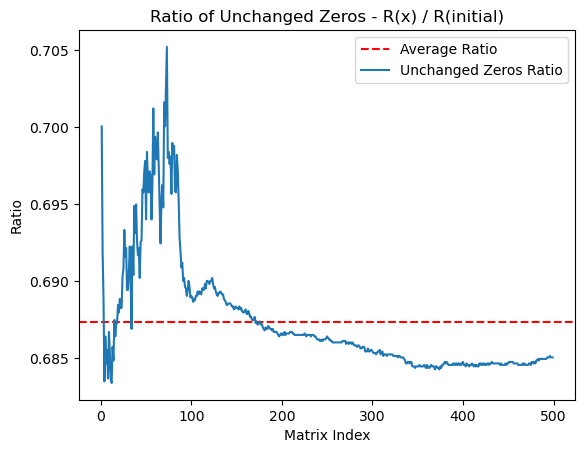

In [258]:
epochs = 500

import numpy as np

# 载入第一个矩阵
first_matrix = np.load('./expdata/expdata_false_shuffle/expdata/initial_activation.npy')

# 计算第一个矩阵中0的位置
zero_mask = (first_matrix == 0)

# 计算第一个矩阵中0的总数
zero_count = np.sum(zero_mask)

# 初始化一个列表来存储每个矩阵的保持0的比例
ratios = []

# 循环载入其余的矩阵
for i in range(1, epochs):
    matrix_path = f'./expdata/expdata_false_shuffle/expdata/gradients_fc1_relu_binary_epoch_{i}_batch_0.npy'
    matrix = np.load(matrix_path)
    
    # 计算在原矩阵0的位置上仍为0的数量
    unchanged_zeros = np.sum(zero_mask & (matrix == 0))
    
    # 计算比例
    ratio = unchanged_zeros / zero_count
    ratios.append(ratio)

# 打印结果
#print(ratios)
import matplotlib.pyplot as plt

# 假设你已经有了 ratios 列表
# ratios = [...]

# 创建一个图形和一个轴
fig, ax = plt.subplots()

# 设置图表标题和轴标签
ax.set_title('Ratio of Unchanged Zeros - R(x) / R(initial)')
ax.set_xlabel('Matrix Index')
ax.set_ylabel('Ratio')

# 生成 x 值列表，从 1 到 999
x_values = list(range(1, epochs))

# 计算平均值
average_ratio = sum(ratios) / len(ratios)

# 绘制平均值线
ax.axhline(y=average_ratio, color='r', linestyle='--', label='Average Ratio')

# 绘制折线图
ax.plot(x_values, ratios, label='Unchanged Zeros Ratio')



# 添加图例
ax.legend()

# 显示图形
plt.show()




In [2]:
import re

def extract_accuracy(filename):
    # Read the file
    with open(filename, 'r') as file:
        data = file.read()

    # Extract all "Accuracy" values and convert percentage to decimal
    accuracy_values = re.findall(r'Accuracy: (\d+)/10000', data)
    accuracy_values = [float(int(value) / 10000) for value in accuracy_values]

    return accuracy_values

# Usage
accuracy_list = extract_accuracy('/Users/jichanglong/Desktop/hssp_new/expdata/initialization_purchase_cifar/purchase_acc.txt')
print(accuracy_list)

[0.5003, 0.6265, 0.72, 0.7615, 0.7602, 0.7814, 0.8002, 0.8143, 0.8112, 0.8016, 0.8071, 0.7699, 0.8343, 0.8325, 0.818, 0.8341, 0.8161, 0.807, 0.8245, 0.8194, 0.8244, 0.8387, 0.8294, 0.8314, 0.8229, 0.848, 0.858, 0.8136, 0.8459, 0.8607, 0.8331, 0.8285, 0.852, 0.8421, 0.8467, 0.8511, 0.8544, 0.8361, 0.8656, 0.8602, 0.8545, 0.871, 0.8628, 0.8451, 0.851, 0.8506, 0.8463, 0.8566, 0.8584, 0.8579, 0.8628, 0.8757, 0.8792, 0.8844, 0.8851, 0.886, 0.8863, 0.886, 0.8863, 0.8873, 0.8877, 0.8879, 0.8876, 0.888, 0.8884, 0.8886, 0.8889, 0.8894, 0.8894, 0.8895, 0.8895, 0.8894, 0.8893, 0.8893, 0.8892, 0.8891, 0.8891, 0.8891, 0.889, 0.8889, 0.8891, 0.8893, 0.8894, 0.8895, 0.8895, 0.8896, 0.8897, 0.8898, 0.8899, 0.8899, 0.8901, 0.8902, 0.8902, 0.8901, 0.8901, 0.8901, 0.8901, 0.8901, 0.8901, 0.8902, 0.8903, 0.8905, 0.8905, 0.8906, 0.8907, 0.8907, 0.8907, 0.8907, 0.8908, 0.8907, 0.8907, 0.8905, 0.8906, 0.8906, 0.8907, 0.8908, 0.8909, 0.891, 0.8912, 0.8912, 0.8911, 0.8913, 0.8913, 0.8913, 0.8912, 0.8912, 0.891

(10, 1024)


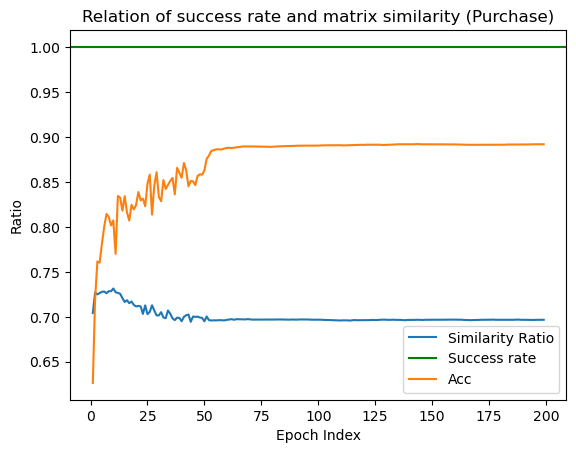

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 载入第一个矩阵
first_matrix = np.load('/Users/jichanglong/Desktop/hssp_new/expdata/initialization_purchase_cifar/purchase/initial_activation.npy')
#first_matrix = np.load('/Users/jichanglong/Desktop/hssp_new/expdata/initialization_purchase_cifar/cifar/initial_activation.npy')

print(first_matrix.shape)
# 计算第一个矩阵中0的位置和总数
zero_mask = (first_matrix == 0)
zero_count = np.sum(zero_mask)

# 计算第一个矩阵中1的位置和总数
one_mask = (first_matrix == 1)
one_count = np.sum(one_mask)

# 初始化列表来存储每个矩阵的比例
ratios = []
zero_percent_ratios = []
one_unchanged_ratios = []
similarity_ratios = []  # 新增相

epochs = 200
# 循环载入其余的矩阵
for i in range(1, epochs):
    matrix_path = f'/Users/jichanglong/Desktop/hssp_new/expdata/initialization_purchase_cifar/purchase/gradients_fc1_relu_binary_epoch_{i}_batch_0.npy'
    #matrix_path = f'/Users/jichanglong/Desktop/hssp_new/expdata/initialization_purchase_cifar/cifar/gradients_fc1_relu_binary_epoch_{i}_batch_0.npy'
    
    matrix = np.load(matrix_path)
    
    # 计算在原矩阵0的位置上仍为0的数量
    unchanged_zeros = np.sum(zero_mask & (matrix == 0))
    ratio = unchanged_zeros / zero_count
    ratios.append(ratio)

    # 计算0占总数的百分比
    total_elements = np.prod(matrix.shape)  # 总元素数量
    zeros = np.sum(matrix == 0)
    zero_percent_ratio = zeros / total_elements
    zero_percent_ratios.append(zero_percent_ratio)
    
    # 计算1的位置不变的个数占初始矩阵的1的个数的比例
    unchanged_ones = np.sum(one_mask & (matrix == 1))
    one_unchanged_ratio = unchanged_ones / one_count
    one_unchanged_ratios.append(one_unchanged_ratio)
    
    # 计算矩阵与初始矩阵的相似度
    difference = np.abs(matrix - first_matrix)
    total_difference = np.sum(difference)
    similarity_ratio = 1 - total_difference / total_elements
    similarity_ratios.append(similarity_ratio)

# 创建图形和轴
fig, ax = plt.subplots()
x_values = list(range(1, epochs))
average_ratio = sum(ratios) / len(ratios)

# 绘制三条线
# ax.plot(x_values, ratios, label='Unchanged Zeros Ratio')
# ax.plot(x_values, zero_percent_ratios, label='Zero Percentage')
# ax.plot(x_values, one_unchanged_ratios, label='Unchanged Ones Ratio')
ax.plot(x_values, similarity_ratios, label='Similarity Ratio')
ax.axhline(y=1, color='g', linestyle='-', label='Success rate')  # 添加恒为1的线
ax.plot(x_values, accuracy_list[1:], label='Acc')

# 绘制平均值线
# ax.axhline(y=average_ratio, color='r', linestyle='--', label='Average Ratio of Unchanged Zeros')

# 设置标题和标签
ax.set_title('Relation of success rate and matrix similarity (Purchase)')
ax.set_xlabel('Epoch Index')
ax.set_ylabel('Ratio')

# 添加图例
ax.legend()

# 显示图形
plt.show()




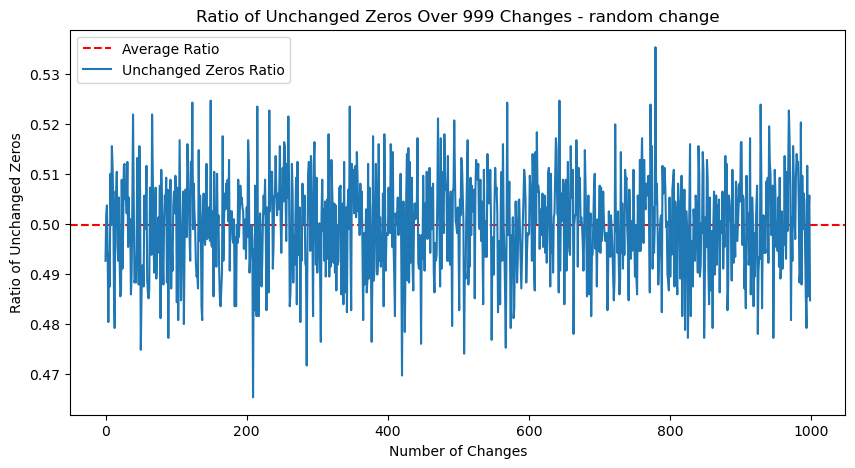

In [245]:
import numpy as np
import matplotlib.pyplot as plt

# 载入第一个矩阵
first_matrix = np.load('./expdata/expdata/gradients_fc1_relu_binary_epoch_0_batch_0.npy')

# 计算第一个矩阵中0的位置
zero_mask = (first_matrix == 0)

# 初始化存储比例的列表
ratios_random = []

# 设置随机种子
np.random.seed(42)

# 进行999次模拟变化
current_matrix = np.copy(first_matrix)
for _ in range(999):
    # 生成一个与当前矩阵相同形状的随机矩阵，每个元素有50%的概率变为0或1
    change_matrix = np.random.choice([0, 1], size=current_matrix.shape)
    
    # 应用变化
    current_matrix = change_matrix
    
    # 计算在第一个矩阵0的位置保持0的数量
    unchanged_zeros = np.sum(zero_mask & (current_matrix == 0))
    
    # 计算比例
    ratio = unchanged_zeros / np.sum(zero_mask)
    ratios_random.append(ratio)
# 绘图
plt.figure(figsize=(10, 5))
    # 计算平均值
average_ratio_random = sum(ratios_random) / len(ratios_random)

plt.axhline(y=average_ratio_random, color='r', linestyle='--', label='Average Ratio')  # 添加平均值线

plt.plot(ratios_random, label='Unchanged Zeros Ratio')
plt.title('Ratio of Unchanged Zeros Over 999 Changes - random change')
plt.xlabel('Number of Changes')
plt.ylabel('Ratio of Unchanged Zeros')
plt.legend()
plt.show()


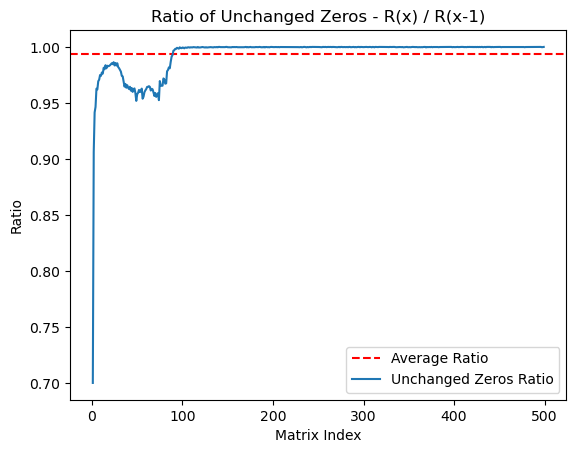

In [257]:
epochs = 500

import numpy as np

# 载入第一个矩阵
first_matrix = np.load('./expdata/expdata_false_shuffle/expdata/initial_activation.npy')


# 初始化一个列表来存储每个矩阵的保持0的比例
ratios_previous = []

# 初始化前一个矩阵为第一个矩阵
previous_matrix = first_matrix

# 计算第一个矩阵中0的位置
zero_mask = (previous_matrix == 0)

# 循环载入其余的矩阵
for i in range(1, epochs):
    matrix_path = f'./expdata/expdata_false_shuffle/expdata/gradients_fc1_relu_binary_epoch_{i}_batch_0.npy'
    current_matrix = np.load(matrix_path)
    
    # 计算前一个矩阵0的总数
    zero_count = np.sum(zero_mask)
    
    # 计算在前一个矩阵0的位置上仍为0的数量
    unchanged_zeros = np.sum(zero_mask & (current_matrix == 0))
    
    # 计算比例
    ratio = unchanged_zeros / zero_count
    ratios_previous.append(ratio)
    
    # 更新前一个矩阵和其0的位置
    previous_matrix = current_matrix
    zero_mask = (previous_matrix == 0)

# 打印结果
#print(ratios_previous)
import matplotlib.pyplot as plt

# 假设你已经有了 ratios 列表
# ratios = [...]

# 创建一个图形和一个轴
fig, ax = plt.subplots()

# 设置图表标题和轴标签
ax.set_title("Ratio of Unchanged Zeros - R(x) / R(x-1)")
ax.set_xlabel('Matrix Index')
ax.set_ylabel('Ratio')

# 生成 x 值列表，从 1 到 999
x_values = list(range(1, epochs))

# 计算平均值
average_ratio = sum(ratios_previous) / len(ratios_previous)

# 绘制平均值线
ax.axhline(y=average_ratio, color='r', linestyle='--', label='Average Ratio')

# 绘制折线图
ax.plot(x_values, ratios_previous, label='Unchanged Zeros Ratio')



# 添加图例
ax.legend()

# 显示图形
plt.show()

In [240]:
data1 = np.load("./expdata/expdata/gradients_fc1_relu_binary_epoch_990_batch_0.npy")

data2 = np.load("./expdata/expdata/gradients_fc1_relu_binary_epoch_991_batch_0.npy")


s = data1-data2

zero_count = np.sum(s== 0)

print(zero_count)

2607


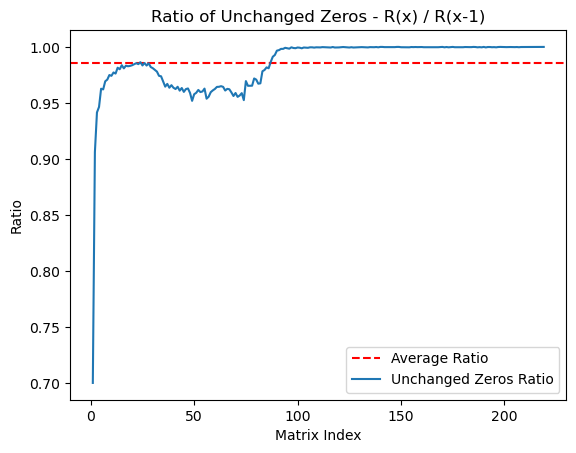

In [5]:
l = [0.1049196720123291, 0.0922861099243164, 0.0500879287719726, 0.1719999313354492, 0.08526611328125, 0.0635368824005127, 0.2053480148315429, 0.0843451023101806, 0.0712490081787109, 0.310342788696289, 0.1027359962463378, 0.0731377601623535, 0.4756507873535156, 0.110617876052856, 0.0759289264678955, 0.5408680438995361, 0.1097242832183837, 0.0861852169036865, 0.7060132026672363, 0.1201798915863037, 0.0897071361541748, 0.8931820392608643, 0.129647970199584, 0.0980641841888427, 1.166813850402832, 0.1256887912750244, 0.1404328346252441, 1.368481159210205, 0.1302897930145263, 0.1113960742950439, 1.657698631286621, 0.1414391994476318, 0.1237549781799316, 2.012099027633667, 0.1599233150482177, 0.1291770935058593, 2.3720829486846924, 0.1575102806091308, 0.2684056758880615, 2.692148208618164, 0.1728010177612304, 0.1480767726898193, 3.2554171085357666, 0.1788339614868164, 0.1571557521820068, 3.434976816177368, 0.2062561511993408, 0.1793291568756103, 4.354933023452759, 0.1975111961364746, 0.1748080253601074, 5.120900869369507, 0.2133708000183105, 0.1813602447509765, 5.823673248291016, 0.2147259712219238, 0.1870491504669189, 6.539183139801025, 0.2198269367218017, 0.1960461139678955, 7.10952091217041, 0.2298166751861572, 0.2193160057067871, 8.150742053985596, 0.2466499805450439, 0.23763108253479, 8.965301990509033, 0.2532007694244385, 0.2362010478973388, 10.42486810684204, 0.2730569839477539, 0.2471249103546142, 11.738024950027466, 0.2710850238800049, 0.2668299674987793, 12.767120838165283, 0.2915546894073486, 0.2687180042266845, 13.718137979507446, 0.2912380695343017, 0.2797932624816894, 16.61153793334961, 0.296483039855957, 0.417104959487915, 16.984193086624146, 0.3321967124938965, 0.3141260147094726, 17.400645971298218, 0.3361678123474121, 0.3366909027099609, 20.09675025939941, 0.3449079990386963, 0.3402738571166992, 21.42215704917908, 0.347679853439331, 0.3463480472564697, 23.703476905822757, 0.3523468971252441, 0.3606579303741455, 25.98611569404602, 0.3988449573516845, 0.3869428634643554, 28.972833156585693, 0.4162721633911133, 0.3810391426086426, 30.271624088287357, 0.411085844039917, 0.4371469020843506, 34.04489493370056, 0.4008510112762451, 0.4044990539550781, 36.24732327461243, 0.5978758335113525, 0.451326847076416, 38.42696237564087, 0.470410823822021, 0.45688509941101, 40.80253195762634, 0.4977452754974365, 0.4803612232208252, 44.86656999588013, 0.5249242782592773, 0.4875409603118896, 49.47881507873535, 0.6371042728424072, 0.5091471672058105, 48.00593900680542, 0.5154690742492676, 0.5193369388580322, 57.57086205482483, 0.5637779235839844, 0.5550360679626465, 61.46116495132446, 0.6611731052398682, 0.7031090259552002, 64.2059268951416, 0.5709419250488281, 0.5883467197418213]

ns_ori = [l[i] for i in range(len(l)) if i%3 == 0]

multi_ori = [l[i] for i in range(len(l)) if i%3 == 1]

stat_ori = [l[i] for i in range(len(l)) if i%3 == 2]

In [8]:
print(len(ns))

NameError: name 'ns' is not defined

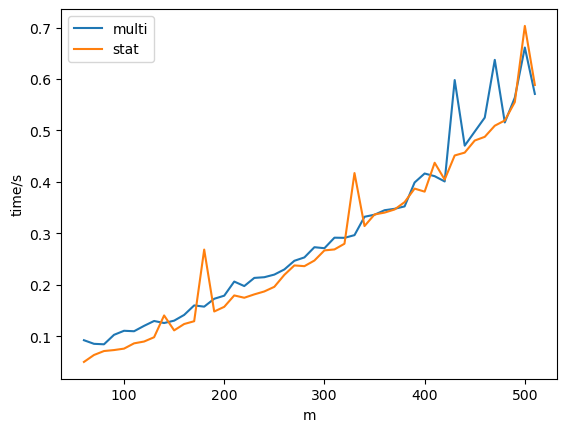

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x_values = [i*10+60 for i in range(46)]

# 绘制三条线
# ax.plot(x_values, ratios, label='Unchanged Zeros Ratio')
# ax.plot(x_values, zero_percent_ratios, label='Zero Percentage')
# ax.plot(x_values, one_unchanged_ratios, label='Unchanged Ones Ratio')
#ax.plot(x_values, ns, label='NS')
ax.plot(x_values, multi, label='multi')
ax.plot(x_values, stat, label='stat')

# 绘制平均值线
# ax.axhline(y=average_ratio, color='r', linestyle='--', label='Average Ratio of Unchanged Zeros')

# 设置标题和标签
#ax.set_title('time consumed')
ax.set_xlabel('m')
ax.set_ylabel('time/s')

# 添加图例
ax.legend()

# 显示图形
plt.show()

15


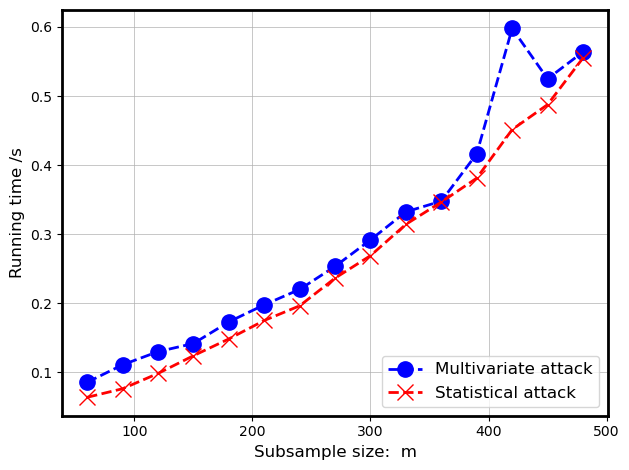

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x_values = [i*30+60 for i in range(15)]

# Generate some dummy data for 'multi' and 'stat' since it's not provided
multi = [multi_ori[i] for i in range(len(multi_ori)) if i%3 == 1]

stat = [stat_ori[i] for i in range(len(stat_ori)) if i%3 == 1]
print(len(multi))
marker_size = 11
# Plot lines with the new styles and markers
ax.plot(x_values, multi, label='Multivariate attack', color='blue', linestyle='--', marker='o', linewidth=2,markersize=marker_size)
ax.plot(x_values, stat, label='Statistical attack', color='red', linestyle='--', marker='x', linewidth=2,markersize=marker_size)

# Add grid lines
ax.grid(True, which='both', linestyle='-', linewidth=0.5)
for spine in ax.spines.values():
    spine.set_linewidth(2)
# Set axis labels
ax.set_xlabel('Subsample size:  m', fontsize=12)
ax.set_ylabel('Running time /s', fontsize=12)

# Set the legend to match the style in the second plot
#legend = ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))
legend = ax.legend(frameon=True, loc='lower right', fontsize=12)
# Set the title if necessary
#ax.set_title('Running time as a function of m')

# Show the plot with tight layout to ensure the legend is placed correctly
plt.tight_layout()

# 保存为PDF格式
plt.savefig('running_time.pdf', bbox_inches='tight')

# 保存为PNG格式
plt.savefig('running_time.png', bbox_inches='tight')

plt.show()


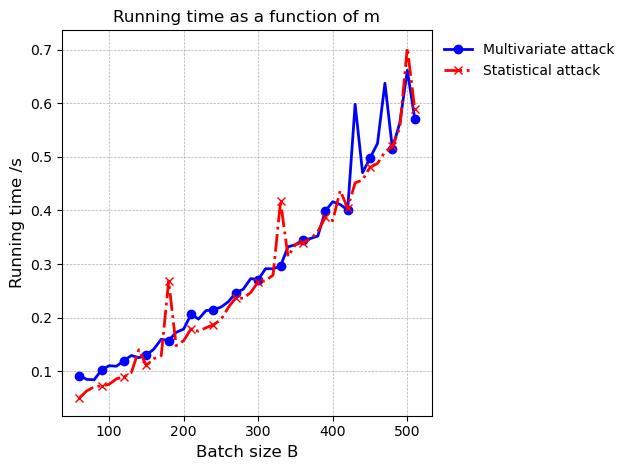

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x_values = [i*10+60 for i in range(46)]

multi = [multi[i] for i in range(len(multi)) if i%3 == 1]

stat = [stat[i] for i in range(len(stat)) if i%3 == 1]

# Calculate the interval for 15 markers
markers_on_each_line = 15
marker_interval = len(x_values) // (markers_on_each_line - 1)

ax.plot(x_values, multi, label='Multivariate attack', color='blue', linestyle='-', marker='o', markevery=marker_interval, linewidth=2)
ax.plot(x_values, stat, label='Statistical attack', color='red', linestyle='-.', marker='x', markevery=marker_interval, linewidth=2)

# Add grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set axis labels
ax.set_xlabel('Batch size B', fontsize=12)
ax.set_ylabel('Running time /s', fontsize=12)

# Set the legend to match the style in the second plot
legend = ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))

# Set the title if necessary
ax.set_title('Running time as a function of m')

# Show the plot with tight layout to ensure the legend is placed correctly
plt.tight_layout()
plt.show()
